# Sberbank Russian Housing Market : Data Imputation
- Train - Neighbourhood and Dependant (21570 rows, 292 columns)
- Test Neighbourhood and Dependant (21570 rows, 291 columns) : No 'price_doc'
- Macro Economic (2484 rows, 100 columns)


1. Train & Test Data Imputation
2. Macro Data Imputation

In [1]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 105)
# pd.set_option('display.width', 105)

In [2]:
from sklearn.preprocessing import LabelBinarizer

## Data Manipulation

In [6]:
train_df = pd.read_csv('datasets/original_data/train.csv')
macro_df = pd.read_csv('datasets/original_data/macro.csv')
test_df = pd.read_csv('datasets/original_data/test.csv')

train_test_df = pd.concat([train_df.drop('price_doc', axis=1), test_df], axis=0).copy().reset_index()
dfy = pd.DataFrame(train_df[['price_doc']])
log_dfy = np.log(dfy)

print("Train datasets : ", train_df.shape)
print("Macro datasets : ", macro_df.shape)
print("Test datasets  : ", test_df.shape)
print("Train&Test     : ", train_test_df.shape)
print("The Y data     : ", dfy.shape)

Train datasets :  (21570, 292)
Macro datasets :  (2484, 100)
Test datasets  :  (8901, 291)
Train&Test     :  (30471, 292)
The Y data     :  (21570, 1)


> ** #Null Check **

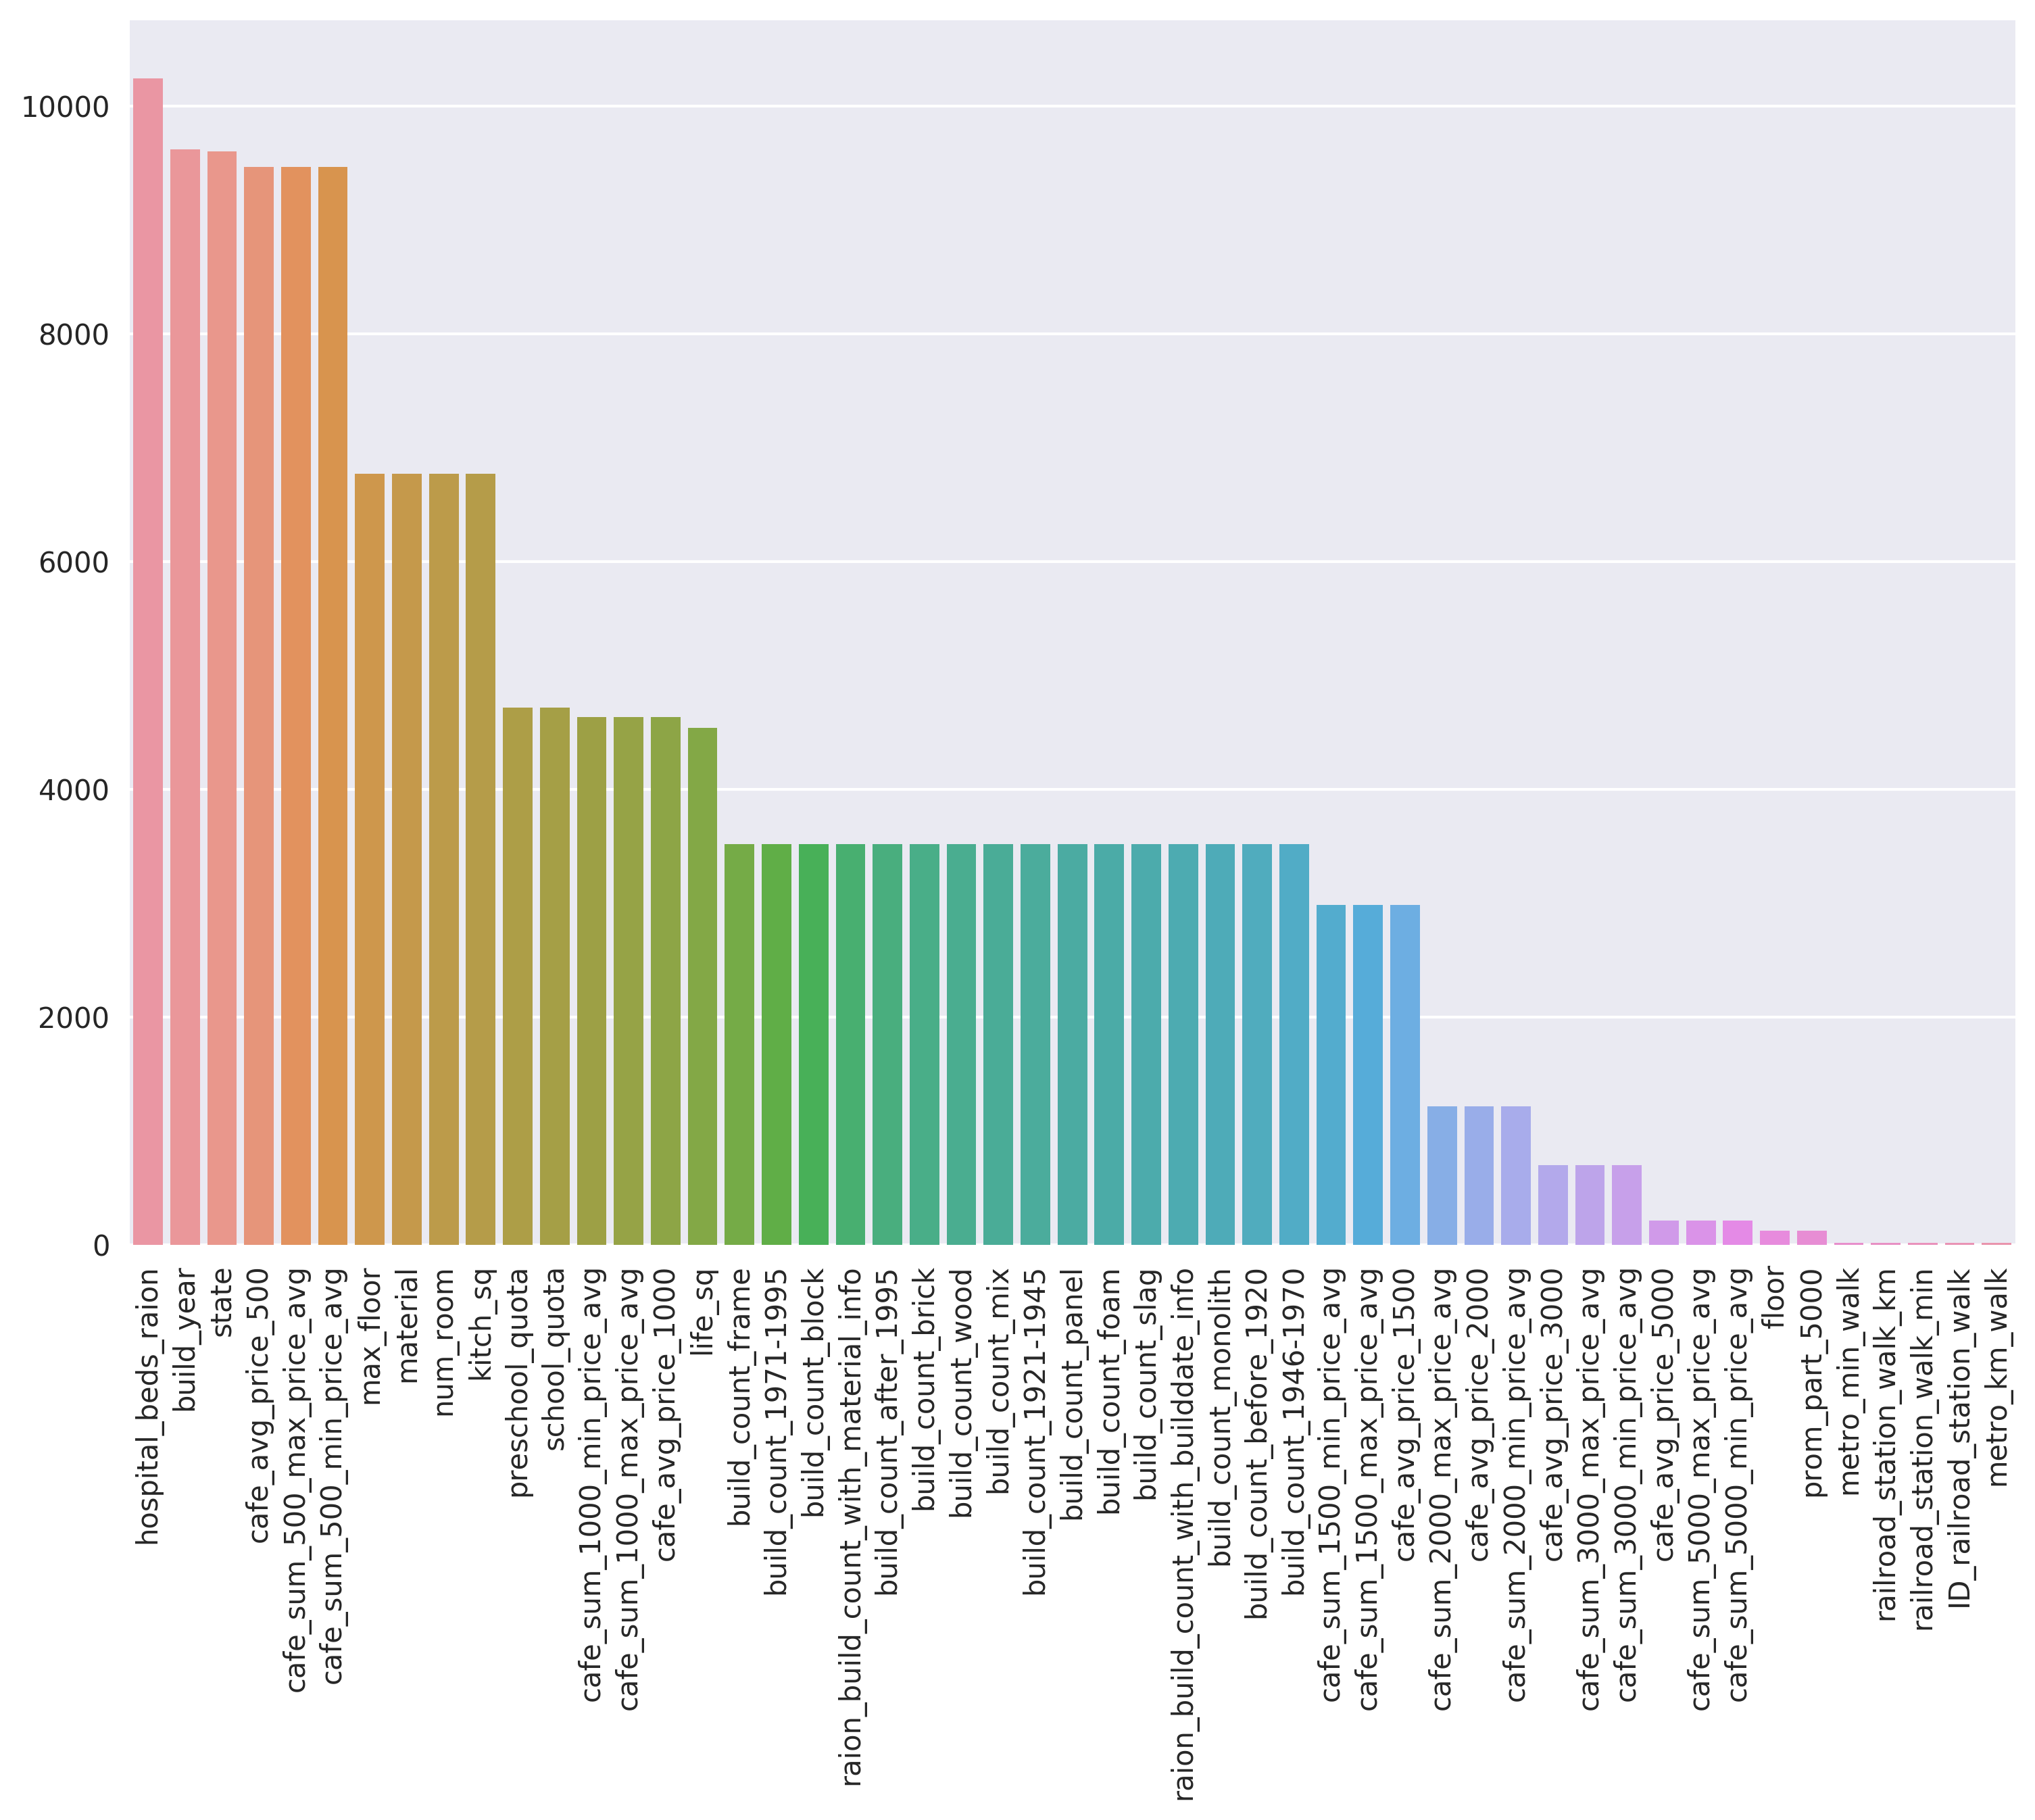

In [3]:
train_df_null = train_df.isnull().sum().sort_values(ascending=False)
train_df_null_is = train_df_null[train_df_null.values > 0]

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.5)
sns.set()

g = sns.barplot(x=train_df_null_is.index, y=train_df_null_is.values)
g.set_xticklabels(train_df_null_is.index, rotation=90)
plt.show()

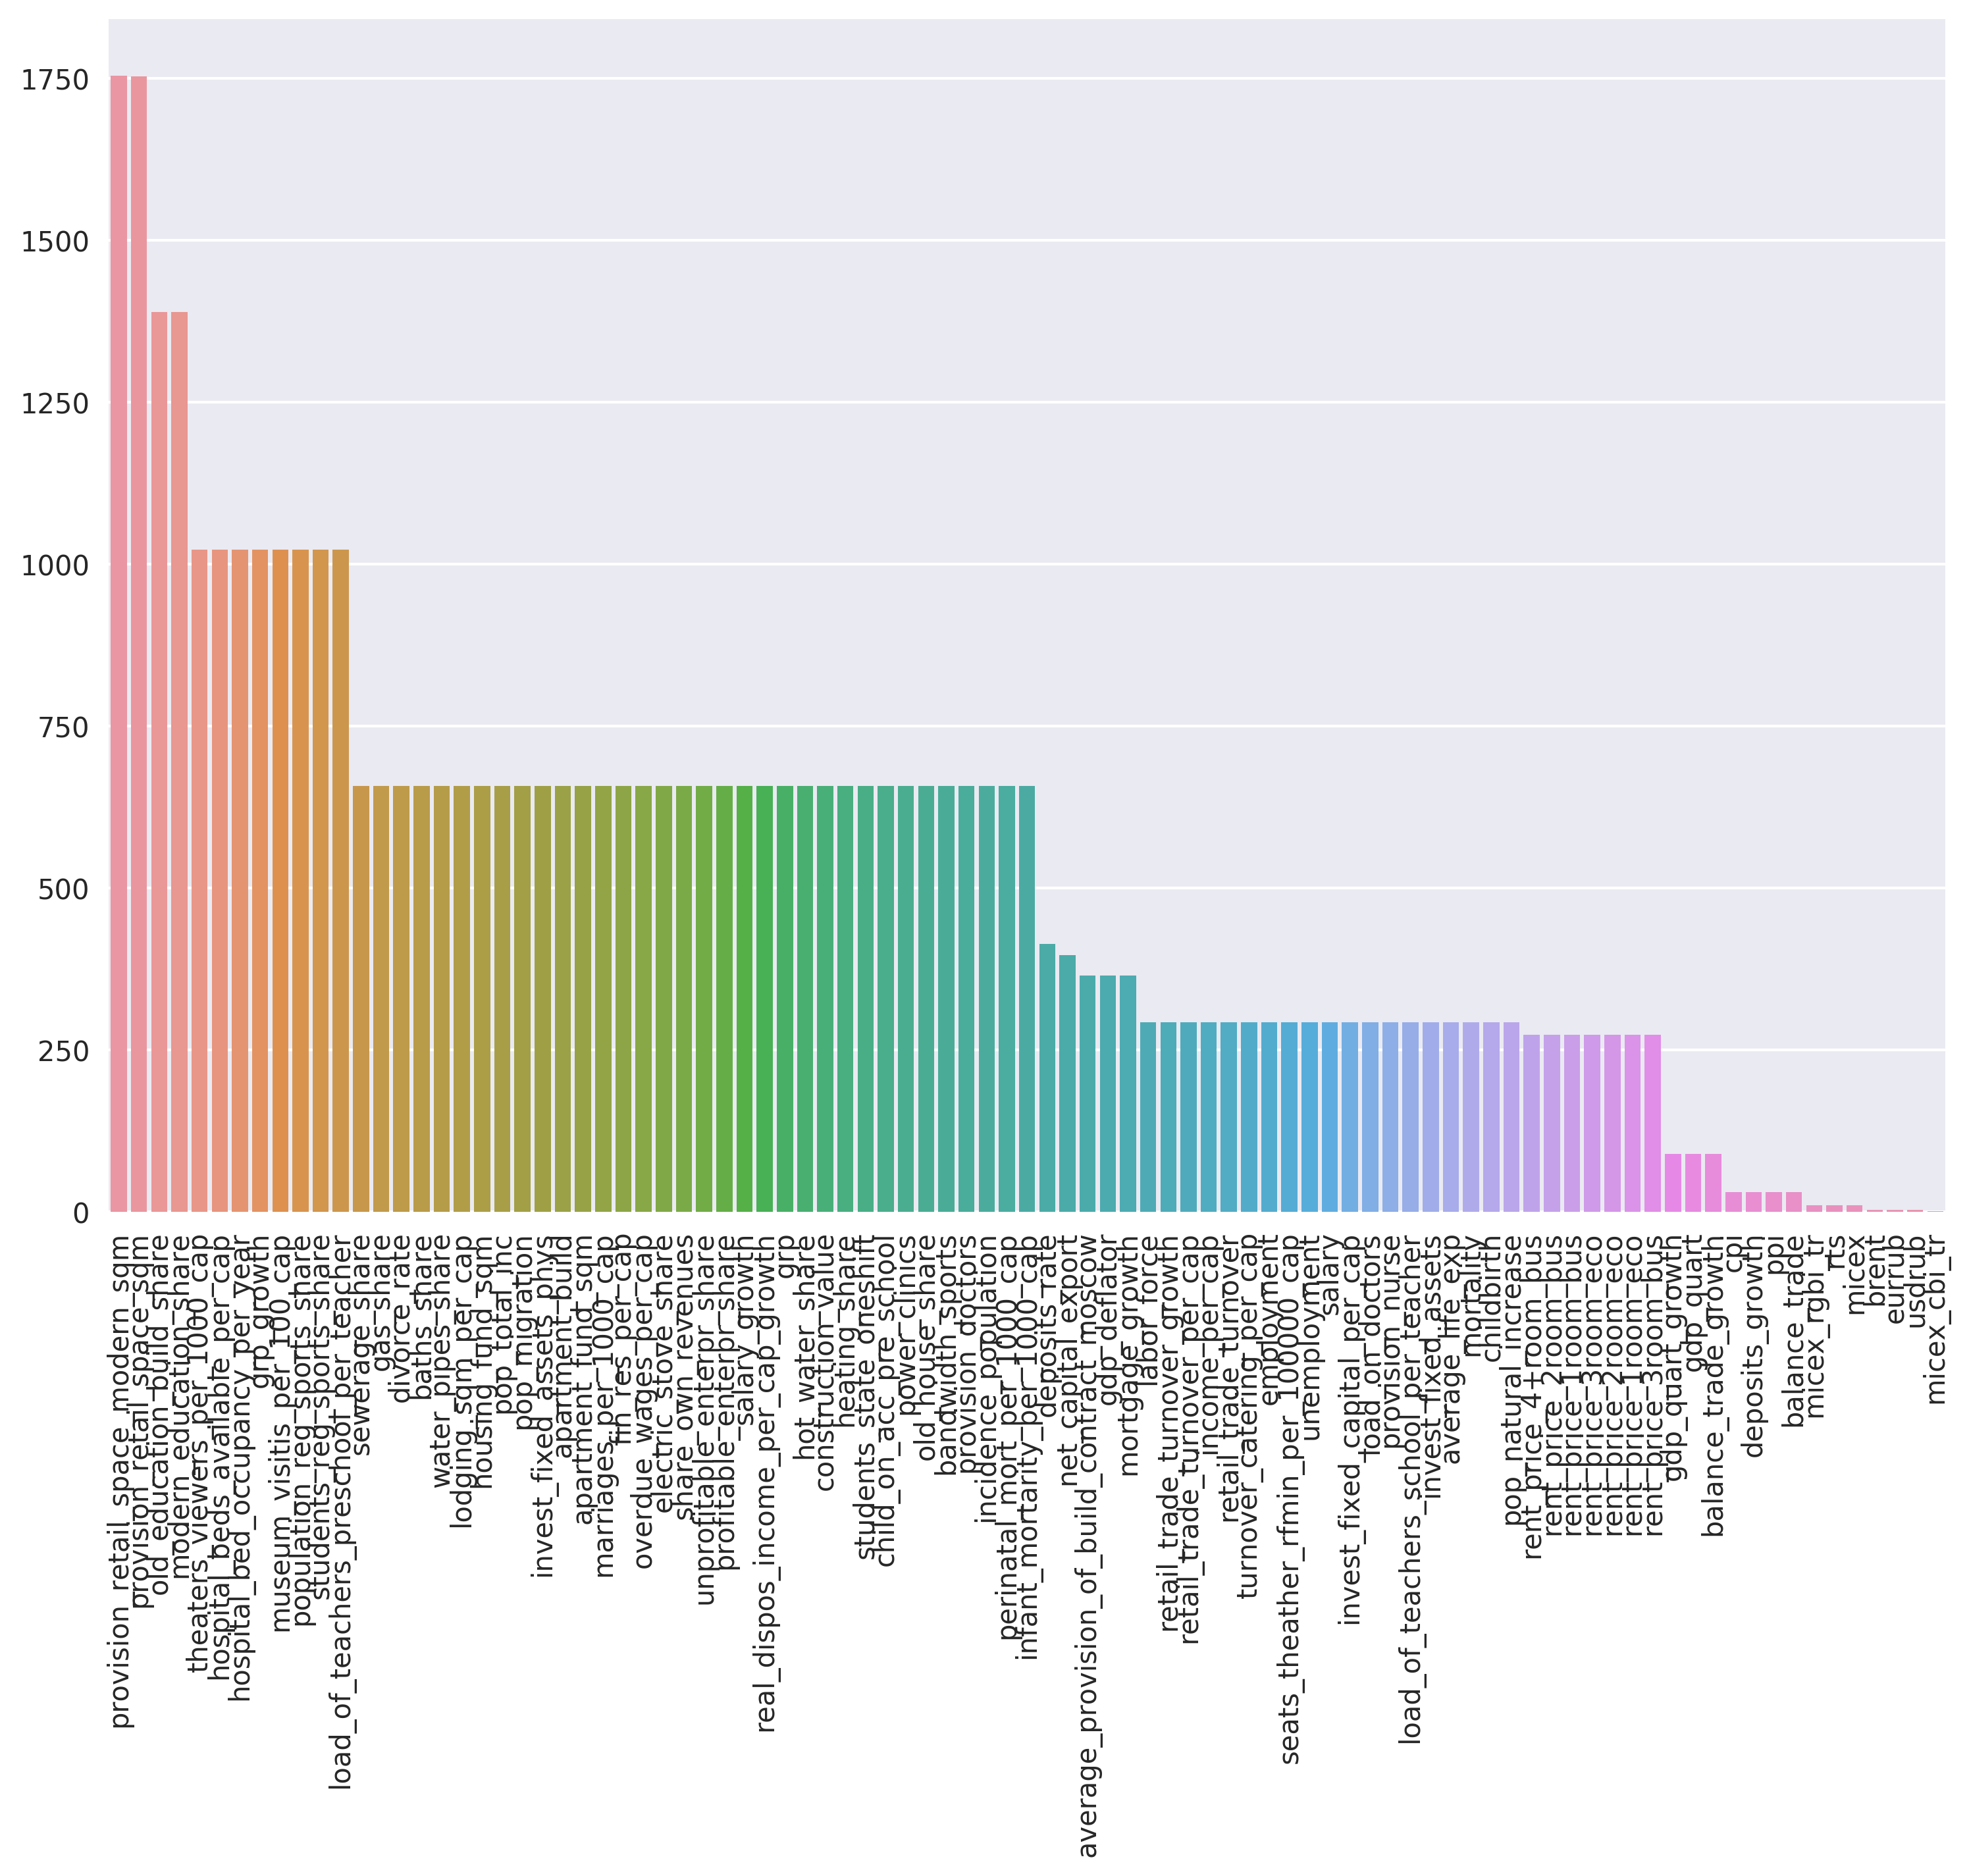

In [4]:
macro_df_null = macro_df.isnull().sum().sort_values(ascending=False)
macro_df_null_is = macro_df_null[macro_df_null.values > 0]

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.5)
sns.set()

g = sns.barplot(x=macro_df_null_is.index, y=macro_df_null_is.values)
g.set_xticklabels(macro_df_null_is.index, rotation=90)
plt.show()

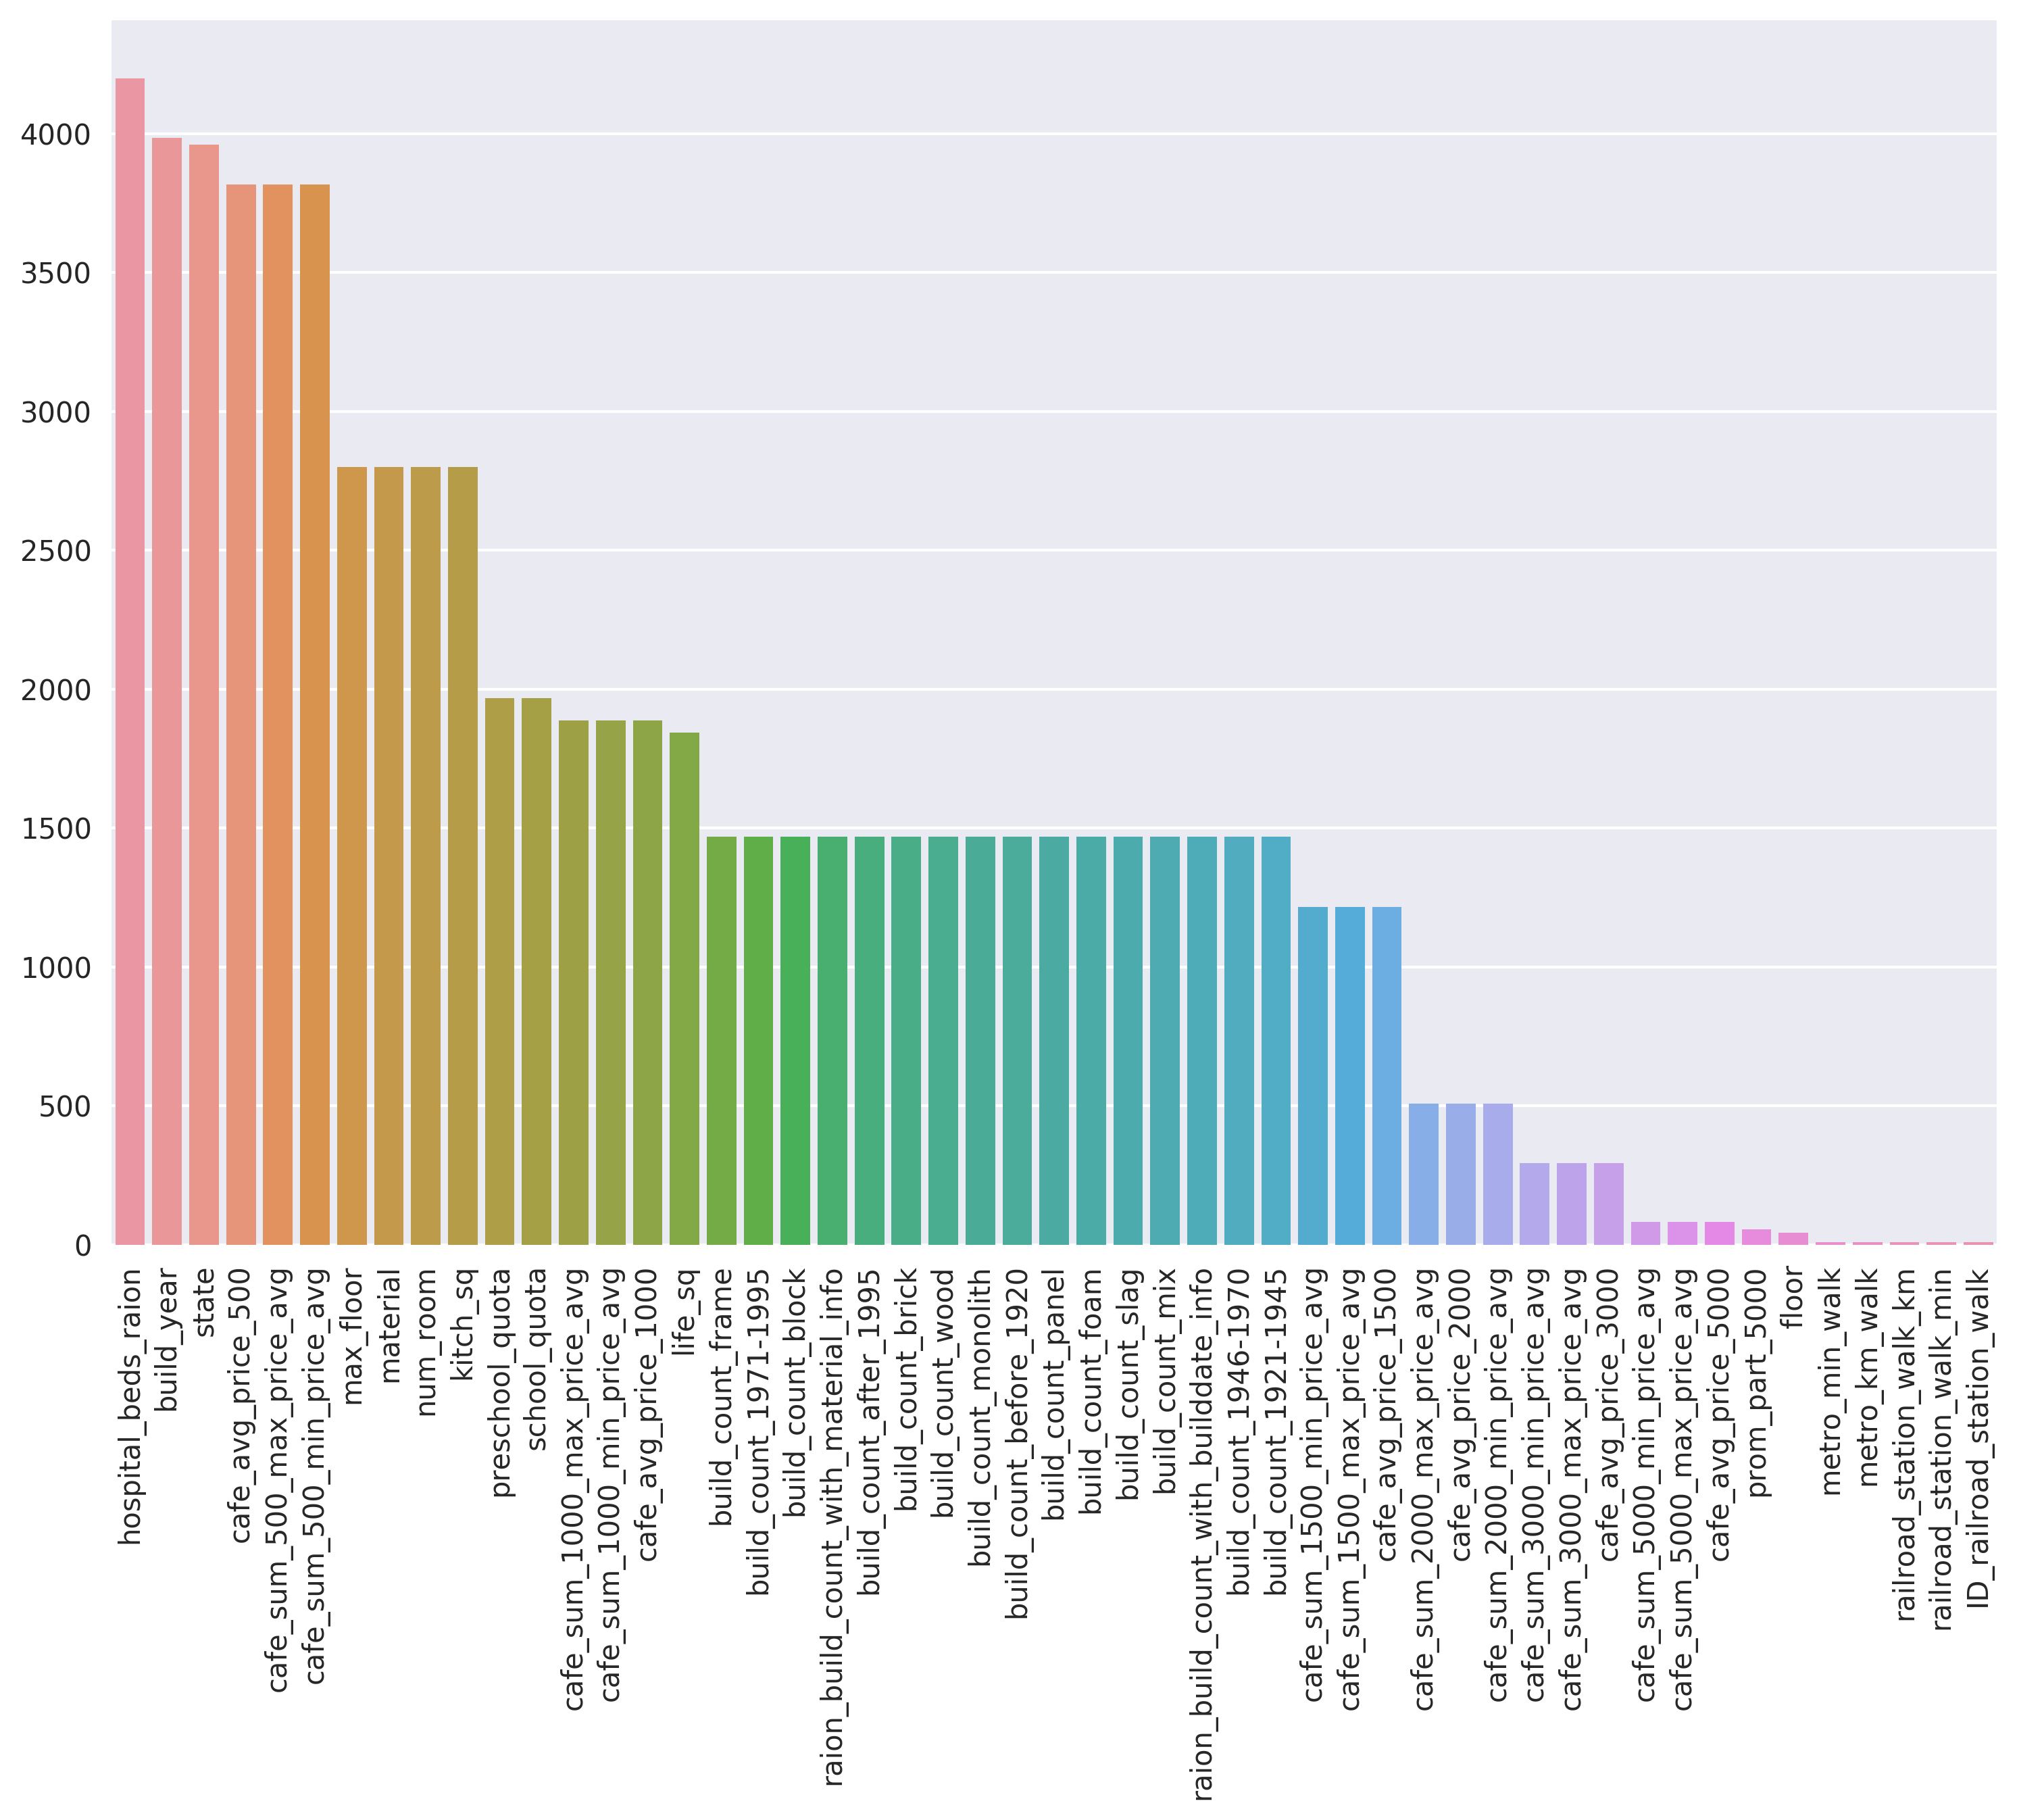

In [5]:
test_df_null = test_df.isnull().sum().sort_values(ascending=False)
test_df_null_is = test_df_null[test_df_null.values > 0]

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.5)
sns.set()

g = sns.barplot(x=test_df_null_is.index, y=test_df_null_is.values)
g.set_xticklabels(test_df_null_is.index, rotation=90)
plt.show()

> ** Basic Description **
- 변수 이름을 고려할 때 오류로 판단되는 데이터 존재

In [6]:
train_df.describe()

id       full_sq       life_sq         floor     max_floor  \
count  21570.000000  21570.000000  17031.000000  21446.000000  14797.000000   
mean   15249.022995     54.266342     34.024485      7.647114     12.541326   
std     8781.672034     42.236384     20.974445      5.307672      6.786803   
min        2.000000      0.000000      0.000000      0.000000      0.000000   
25%     7649.250000     38.000000     20.000000      3.000000      9.000000   
50%    15239.500000     49.000000     30.000000      6.000000     12.000000   
75%    22834.750000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000    802.000000     44.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  14797.000000  1.194900e+04  14797.000000  14797.000000  11970.000000   
mean       1.830709  3.558447e+03      1.909982      6.567142      2.111028   
std        1.482367  1.834225e+05      0.860274     33.430237      0.893036   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.966000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

           ...       cafe_count_5000_price_2500  cafe_count_5000_price_4000  \
count      ...                     21570.000000                21570.000000   
mean       ...                        32.368475                   10.894251   
std        ...                        73.941074                   28.564701   
min        ...                         0.000000                    0.000000   
25%        ...                         2.000000                    1.000000   
50%        ...                         8.000000                    2.000000   
75%        ...                        22.000000                    5.000000   
max        ...                       376.000000                  147.000000   

       cafe_count_5000_price_high  big_church_count_5000  church_count_5000  \
count                21570.000000           21570.000000       21570.000000   
mean                     1.785350              15.201530          30.479601   
std                      5.441593              29.319305          47.665514   
min                      0.000000               0.000000           0.000000   
25%                      0.000000               2.000000           9.000000   
50%                      0.000000               7.000000          16.000000   
75%                      1.000000              12.000000          28.000000   
max                     30.000000             151.000000         250.000000   

       mosque_count_5000  leisure_count_5000  sport_count_5000  \
count       21570.000000        21570.000000      21570.000000   
mean            0.443718            8.743579         52.986324   
std             0.610089           20.717322         46.441714   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000         11.000000   
50%             0.000000            2.000000         48.000000   
75%             1.000000            7.000000         76.000000   
max             2.000000          105.000000        218.000000   

       market_count_5000     price_doc  
count       21570.000000  2.157000e+04  
mean            6.006305  7.109162e+06  
std             4.906078  4.794684e+06  
min             0.000000  1.000000e+05  
25%             1.000000  4.735000e+06  
50%             5.000000  6.250000e+06  
75%            10.000000  8.220093e+06  
max            21.000000  1.111111e+08  

[8 rows x 276 columns]

In [7]:
macro_df.describe()

oil_urals     gdp_quart  gdp_quart_growth          cpi          ppi  \
count  2484.000000   2394.000000       2394.000000  2453.000000  2453.000000   
mean     86.467157  16993.230075          1.523726   407.808398   480.216347   
std      27.528709   3187.074480          2.875659    65.895969    70.286366   
min      29.112500   9995.800000         -4.500000   315.100000   337.200000   
25%      61.283300  14925.000000          0.400000   354.000000   438.400000   
50%     101.416500  17442.100000          1.300000   393.000000   473.500000   
75%     109.310000  19284.100000          4.100000   469.400000   520.700000   
max     122.520000  22016.100000          5.200000   531.000000   606.100000   

       gdp_deflator  balance_trade  balance_trade_growth       usdrub  \
count   2119.000000    2453.000000           2394.000000  2481.000000   
mean     110.122308      15.344006             16.846742    40.732406   
std       14.818429       3.878104             16.988727    15.006583   
min       86.721000       5.823000             -4.100000    27.276300   
25%      100.000000      12.785000              7.200000    30.508800   
50%      108.299000      16.041000             10.500000    32.316500   
75%      123.661000      18.076000             21.500000    53.752300   
max      133.160000      21.939000             75.800000    82.276400   

            eurrub         ...          provision_retail_space_modern_sqm  \
count  2481.000000         ...                                 730.000000   
mean     50.444801         ...                                 480.500000   
std      13.905912         ...                                 209.643641   
min      37.445400         ...                                 271.000000   
25%      40.242600         ...                                 271.000000   
50%      42.862200         ...                                 480.500000   
75%      61.323700         ...                                 690.000000   
max      90.881500         ...                                 690.000000   

       turnover_catering_per_cap  theaters_viewers_per_1000_cap  \
count                2191.000000                     1461.00000   
mean                 8691.922410                      580.51540   
std                  1668.967502                       37.98811   
min                  6221.000000                      527.00000   
25%                  6943.000000                      565.00000   
50%                  8522.000000                      603.00000   
75%                 10311.000000                      603.00000   
max                 10805.000000                      627.00000   

       seats_theather_rfmin_per_100000_cap  museum_visitis_per_100_cap  \
count                          2191.000000                 1461.000000   
mean                              0.443398                 1245.543463   
std                               0.016061                  162.526951   
min                               0.410000                  993.000000   
25%                               0.439390                 1240.000000   
50%                               0.450700                 1309.000000   
75%                               0.453560                 1309.000000   
max                               0.458880                 1440.000000   

       bandwidth_sports  population_reg_sports_share  \
count       1826.000000                   1461.00000   
mean      349902.577766                     25.06859   
std        72146.453110                      2.44944   
min       269768.000000                     22.37000   
25%       288177.000000                     23.01000   
50%       329348.000000                     23.01000   
75%       398451.000000                     26.70000   
max       463938.000000                     28.20000   

       students_reg_sports_share  apartment_build  apartment_fund_sqm  
count                1461.000000      1826.000000         1826.000000  
mean            

In [8]:
test_df.describe()

id      full_sq      life_sq        floor    max_floor  \
count   8901.000000  8901.000000  7057.000000  8858.000000  6102.000000   
mean   15211.004943    54.088080    35.317415     7.728155    12.601770   
std     8832.771537    25.071191    90.936086     5.349556     6.682981   
min        1.000000     0.000000     0.000000     0.000000     0.000000   
25%     7539.000000    39.000000    20.000000     3.000000     9.000000   
50%    15237.000000    50.000000    30.000000     7.000000    12.000000   
75%    22911.000000    63.000000    43.000000    11.000000    17.000000   
max    30470.000000   729.000000  7478.000000    77.000000    99.000000   

          material   build_year     num_room     kitch_sq        state  \
count  6102.000000  4917.000000  6102.000000  6102.000000  4942.000000   
mean      1.818420  1876.341468     1.909374     5.992298     2.097329   
std       1.478292   452.713434     0.830977     5.115141     0.848130   
min       1.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000  1967.000000     1.000000     1.000000     1.000000   
50%       1.000000  1979.000000     2.000000     6.000000     2.000000   
75%       2.000000  2005.000000     2.000000     9.000000     3.000000   
max       6.000000  2017.000000    10.000000   112.000000     4.000000   

             ...          cafe_count_5000_price_1500  \
count        ...                         8901.000000   
mean         ...                           62.071790   
std          ...                          122.065811   
min          ...                            0.000000   
25%          ...                            6.000000   
50%          ...                           24.000000   
75%          ...                           50.000000   
max          ...                          639.000000   

       cafe_count_5000_price_2500  cafe_count_5000_price_4000  \
count                 8901.000000                 8901.000000   
mean                    31.306707                   10.516346   
std                     72.299039                   27.946878   
min                      0.000000                    0.000000   
25%                      2.000000                    1.000000   
50%                      8.000000                    2.000000   
75%                     20.000000                    4.000000   
max                    377.000000                  145.000000   

       cafe_count_5000_price_high  big_church_count_5000  church_count_5000  \
count                 8901.000000            8901.000000        8901.000000   
mean                     1.738906              14.667565          29.698798   
std                      5.363351              28.624735          46.567387   
min                      0.000000               0.000000           0.000000   
25%                      0.000000               2.000000           9.000000   
50%                      0.000000               7.000000          16.000000   
75%                      0.000000              12.000000          28.000000   
max                     29.000000             151.000000         250.000000   

       mosque_count_5000  leisure_count_5000  sport_count_5000  \
count        8901.000000         8901.000000       8901.000000   
mean            0.439276            8.419166         52.336816   
std             0.607299           20.245252         45.928792   
min             0.000000            0.000000          0.000000   
25%             0.000000            0.000000         11.000000   
50%             0.000000            2.000000         47.000000   
75%             1.000000            6.000000         75.000000   
max             2.000000          106.000000        216.000000   

       market_count_5000  
count        8901.000000  
mean            5.940456  
std             4.848079  
min             0.000000  
25%             1.000000  
50%             5.000000  
75%            10.000000  
max            20.000000  

[8 rows x 275 columns]

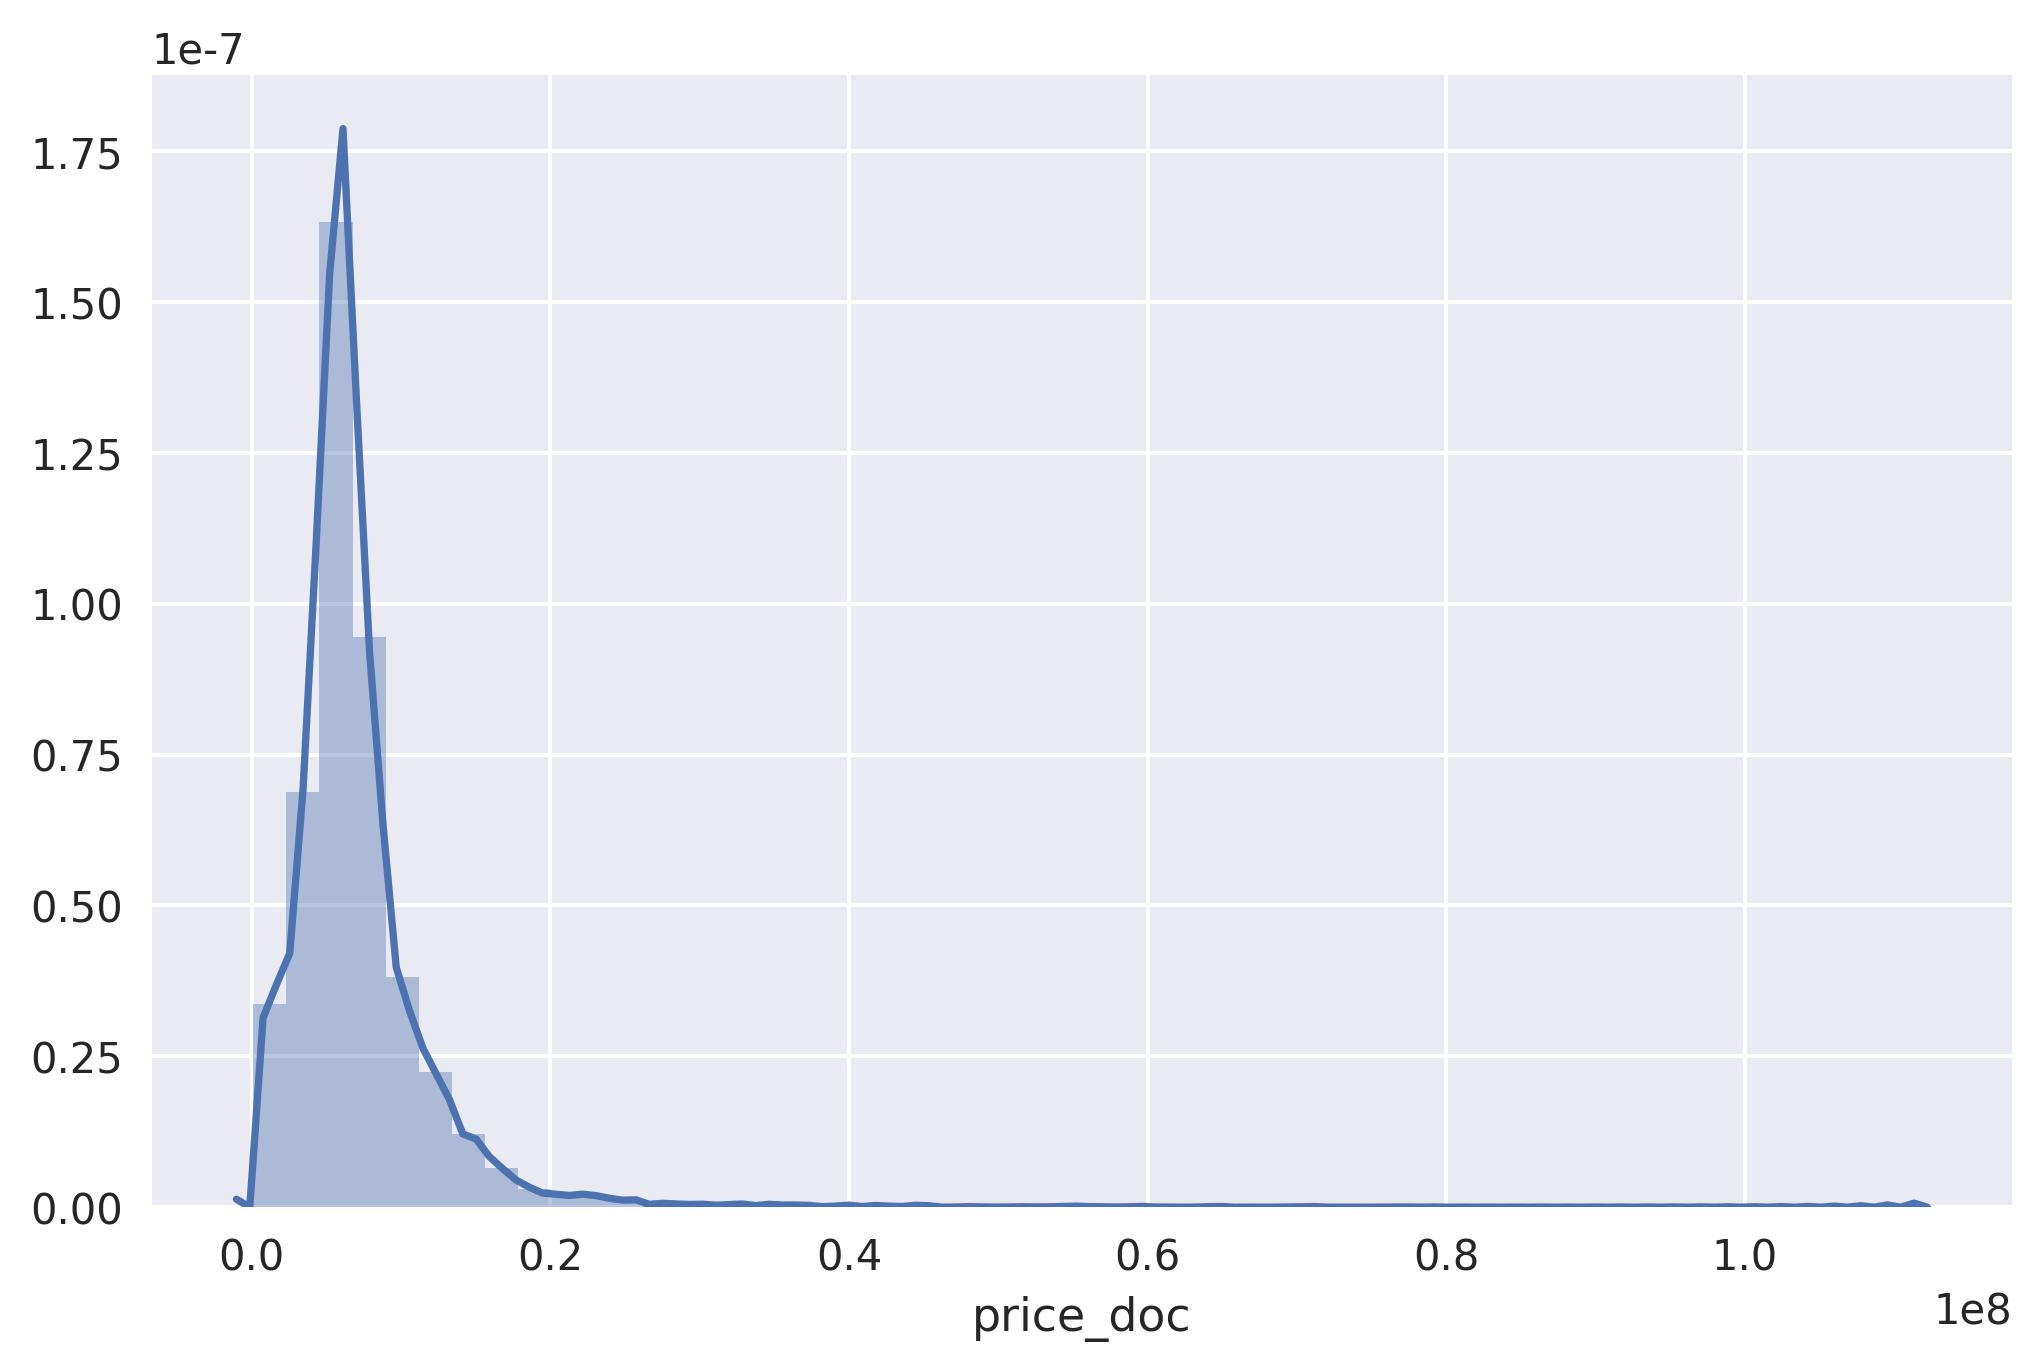

In [9]:
sns.distplot(train_df.loc[:, 'price_doc'])

> 아웃라이어 제외 왼쪽으로 쏠린 형태로 로그 값을 취함

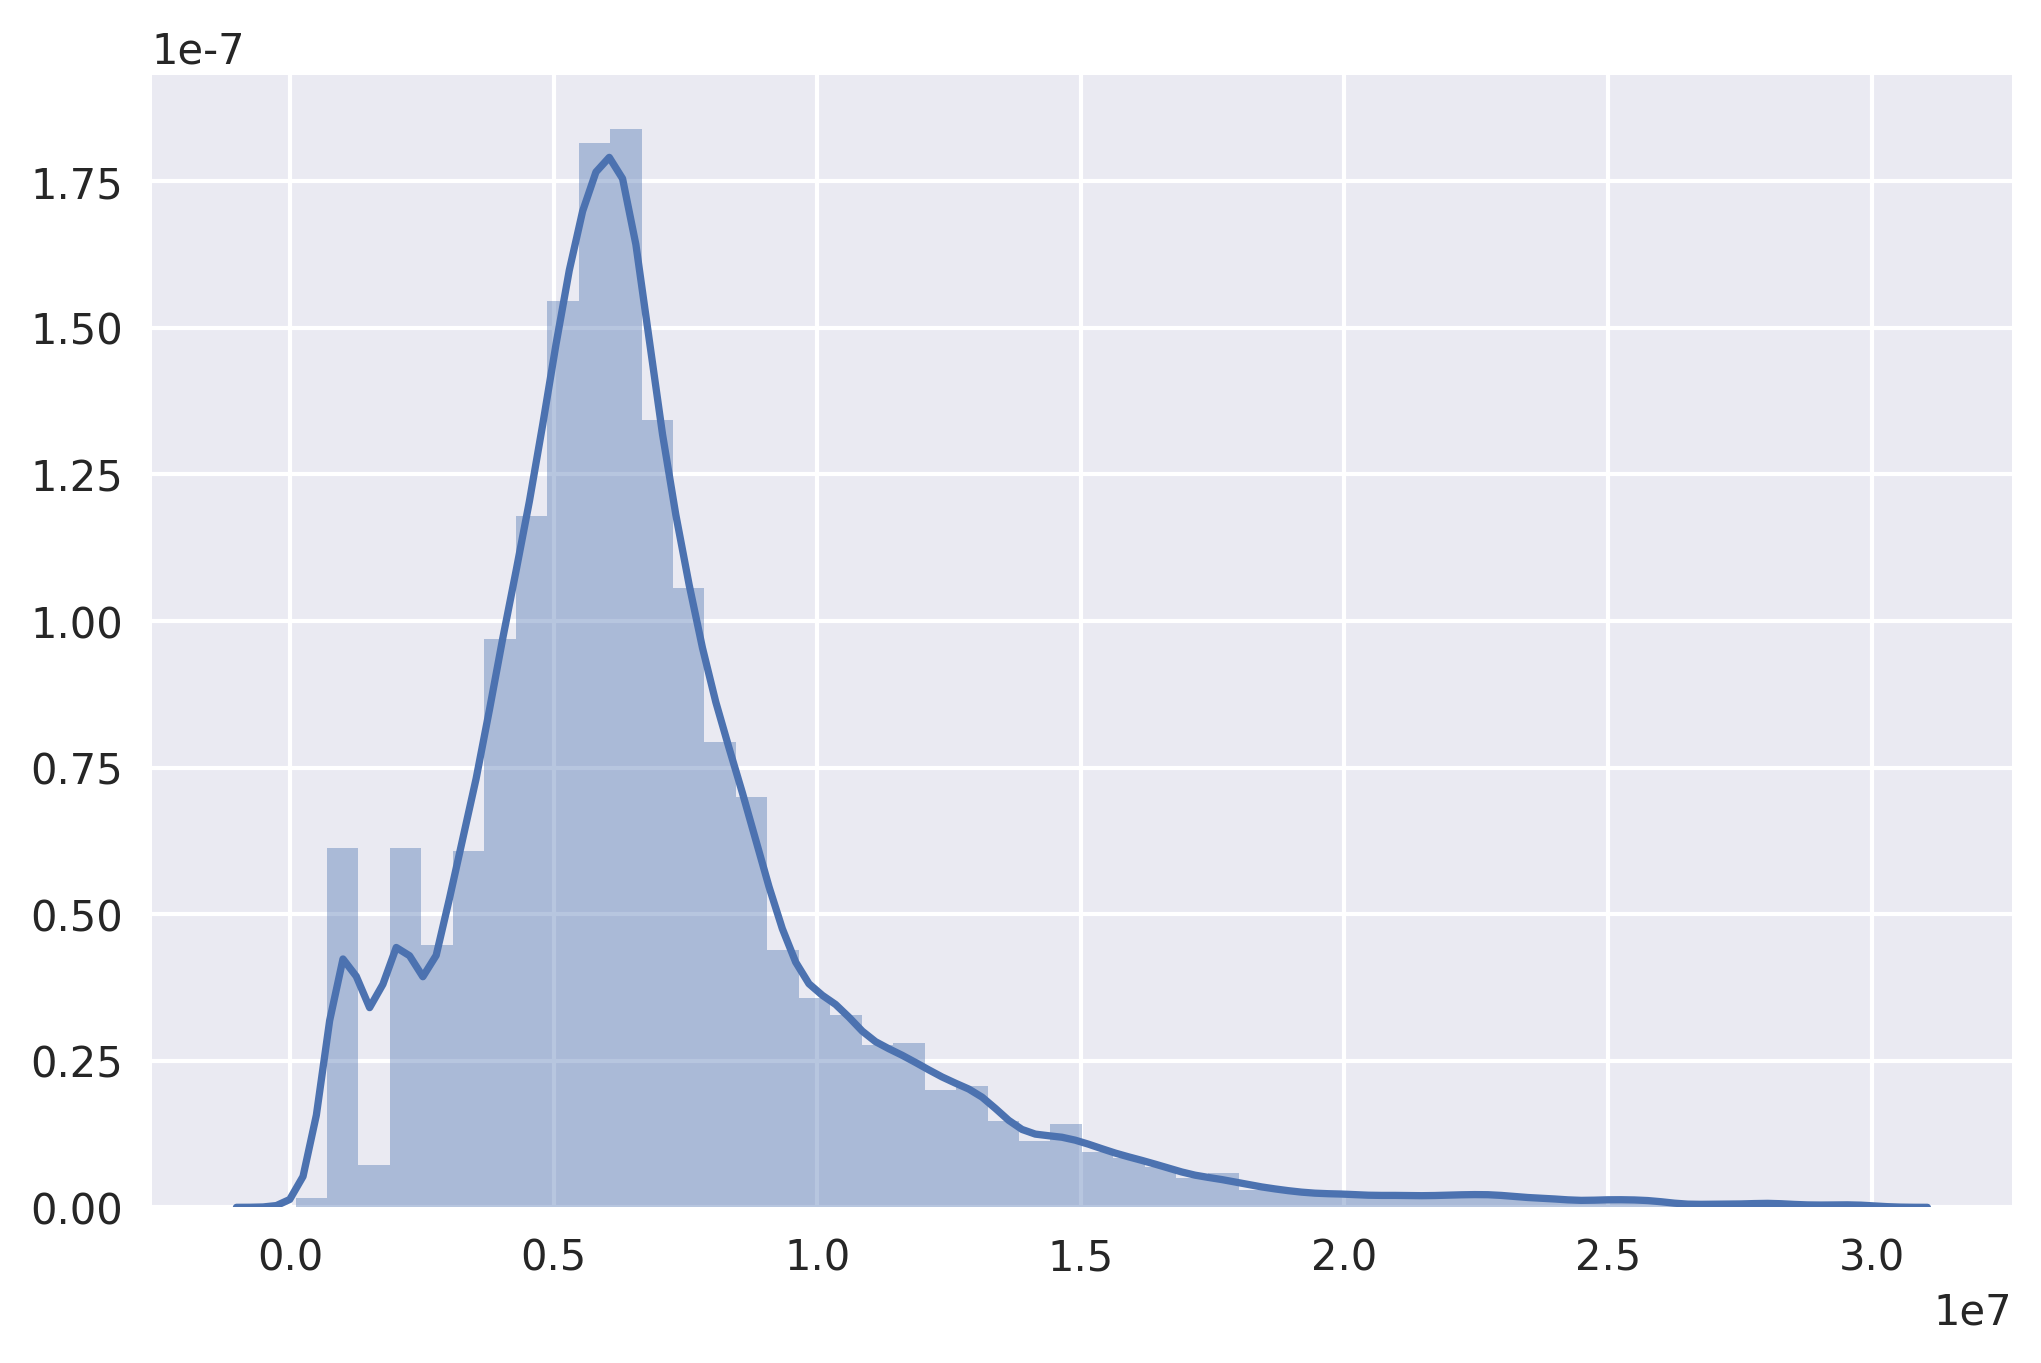

In [10]:
sns.distplot(train_df[['price_doc']].loc[train_df['price_doc'] < 30000000, :])

##  
##  1. Train & Test Imputation

 ** Y와 관련성 높은 변수는 세심하게 imputation, 나머지는 한꺼번에 처리함 **
 ** 일부 난값이 많은 변수의 경우 세심하게 처리 **

> ** 독립변수 간 상관관계 확인 (TEST 포함) **

In [11]:
plt.figure(figsize=(30, 30))
dfX_corr_df = train_test_df.dropna().corr()
sns.heatmap(dfX_corr_df, xticklabels=dfX_corr_df.columns, yticklabels=dfX_corr_df.columns)

> ** 종속변수 - 독립변수 간 상관관계 확인 후 높은 수치를 보이는 독립변수부터 고려하여 Imputation **

In [247]:
dfy_train_df_corr = train_df.dropna().corr()[['price_doc']]
dfy_train_df_corr.sort_values('price_doc', ascending=False).head(n=60).head(n=20)

price_doc
price_doc                     1.000000
full_sq                       0.701070
life_sq                       0.543994
num_room                      0.471955
kitch_sq                      0.341632
office_sqm_5000               0.266356
ID_metro                      0.259965
cafe_count_5000_price_2500    0.256351
cafe_count_5000_price_1500    0.254383
cafe_count_5000_price_high    0.252322
cafe_count_5000_price_1000    0.252283
cafe_count_5000               0.251853
cafe_sum_5000_min_price_avg   0.249189
cafe_count_5000_price_4000    0.248364
sport_count_5000              0.248229
cafe_avg_price_5000           0.245496
cafe_count_5000_price_500     0.244356
cafe_count_5000_na_price      0.243983
cafe_sum_5000_max_price_avg   0.242954
office_count_5000             0.237947

> y와의 상관관계가 높은 변수의 난값

In [13]:
train_test_df.loc[:, dfy_train_df_corr.sort_values('price_doc', ascending=False).index[1:20]].isnull().sum()

full_sq                           0
life_sq                        6383
num_room                       9572
kitch_sq                       9572
office_sqm_5000                   0
ID_metro                          0
cafe_count_5000_price_2500        0
cafe_count_5000_price_1500        0
cafe_count_5000_price_high        0
cafe_count_5000_price_1000        0
cafe_count_5000                   0
cafe_sum_5000_min_price_avg     297
cafe_count_5000_price_4000        0
sport_count_5000                  0
cafe_avg_price_5000             297
cafe_count_5000_price_500         0
cafe_count_5000_na_price          0
cafe_sum_5000_max_price_avg     297
office_count_5000                 0
dtype: int64

> ** 'full_sq', 'life_sq', 'num_room', 'kitch_sq', 'max_floor' are highly correlated and show high correlation with the Y **

In [14]:
high_corr_with_y_lst = dfy_train_df_corr.sort_values('price_doc', ascending=False).index[1:10]
dfX_corr_df.loc[:, high_corr_with_y_lst]
for variable in high_corr_with_y_lst:
    temp_lst = list(dfX_corr_df.loc[:, variable].abs().sort_values(ascending=False).index[:10])
    print("for {} variable".format(str(variable)))
    print(temp_lst)
    print()
    print("="*50)

for full_sq variable
['full_sq', 'life_sq', 'num_room', 'kitch_sq', 'max_floor', 'cafe_count_500_price_1500', 'floor', 'cafe_count_500', 'cafe_count_1000_price_1500', 'cafe_count_2000_price_high']

for life_sq variable
['life_sq', 'full_sq', 'num_room', 'cafe_count_1000_na_price', 'cafe_count_1500_na_price', 'cafe_count_2000_price_high', 'cafe_count_1500_price_2500', 'cafe_count_3000_price_4000', 'cafe_count_1000_price_2500', 'cafe_count_1500']

for num_room variable
['num_room', 'full_sq', 'life_sq', 'kitch_sq', 'cafe_count_500_price_1500', 'office_count_500', 'cafe_count_1000_price_high', 'office_count_1000', 'cafe_count_500_price_1000', 'office_count_1500']

for kitch_sq variable
['kitch_sq', 'max_floor', 'full_sq', 'floor', 'life_sq', 'num_room', 'big_church_count_500', 'church_count_500', 'state', 'cafe_count_1000_price_4000']

for office_sqm_5000 variable
['office_sqm_5000', 'office_count_5000', 'cafe_count_5000_na_price', 'cafe_count_5000', 'cafe_count_5000_price_1000', 'office_

##  
##  1.1 Area
- Area 관련 변수를 나열해보았으나 최솟값, 최댓값 전처리 필요, 방개수에 따른 규칙적인 증가세를 보임

In [248]:
area_impu_df = train_test_df.loc[:,['full_sq','life_sq', 'num_room', 'kitch_sq']]
area_impu_df.head(n=20)

full_sq  life_sq  num_room  kitch_sq
0        34     19.0       NaN       NaN
1        89     50.0       NaN       NaN
2        77     77.0       NaN       NaN
3        25     14.0       NaN       NaN
4        44     44.0       NaN       NaN
5        42     27.0       NaN       NaN
6        36     21.0       NaN       NaN
7        36     19.0       NaN       NaN
8        38     19.0       NaN       NaN
9        43     28.0       NaN       NaN
10       31     31.0       NaN       NaN
11       31     21.0       NaN       NaN
12       47     31.0       NaN       NaN
13       44     29.0       NaN       NaN
14       39     39.0       NaN       NaN
15       45     29.0       NaN       NaN
16       35     20.0       NaN       NaN
17       38     20.0       NaN       NaN
18       73     38.0       NaN       NaN
19       42     27.0       NaN       NaN

In [249]:
area_impu_df.groupby('full_sq').aggregate(np.mean).head(n=20)

life_sq  num_room   kitch_sq
full_sq                                
0        38.500000  1.500000   0.000000
1         9.625000  1.166667   1.000000
5        40.000000       NaN        NaN
6              NaN       NaN        NaN
9        44.000000       NaN        NaN
10       10.000000       NaN        NaN
11       11.000000  1.000000  12.000000
12        8.250000  1.000000   0.333333
13       10.555556  1.500000   2.250000
14       10.571429  1.500000   3.000000
15       11.187500  1.000000   1.153846
16       11.142857  1.125000   0.875000
17       12.777778  1.090909   2.454545
18       14.791667  1.000000   1.833333
19       14.160000  1.000000   0.000000
20       12.619048  1.000000   2.785714
21       12.909091  1.000000   3.142857
22       16.000000  1.400000  13.600000
23       15.818182  1.000000   3.333333
24       13.666667  1.000000   4.333333

In [17]:
area_impu_df.groupby('num_room').aggregate(np.mean)

full_sq     life_sq   kitch_sq
num_room                                   
0.0        80.071429   77.125000   1.928571
1.0        38.548934   22.352583   6.249540
2.0        54.091613   33.292424   5.874816
3.0        75.416043   50.765577   7.282139
4.0       101.837321   66.396325   9.000000
5.0       124.325000   85.026316  10.950000
6.0       166.888889  101.142857   8.888889
7.0       145.000000  109.000000   9.000000
8.0       174.333333  124.333333  14.666667
9.0       220.000000  144.000000  17.000000
10.0       58.500000   33.500000  10.000000
17.0       51.000000   30.000000   8.000000
19.0       40.000000   19.000000   7.000000

In [251]:
area_impu_df.groupby('life_sq').aggregate(np.mean).head(n=20)

full_sq  num_room   kitch_sq
life_sq                                
0.0      57.488889  1.783784   1.000000
1.0      56.664103  1.760925   1.544987
7.0      40.000000  2.000000   7.000000
8.0      21.428571  1.200000   3.200000
9.0      22.266667  1.111111   5.888889
10.0     27.727273  1.187500   6.000000
11.0     21.659574  1.027778   3.916667
12.0     25.750000  1.032258   4.709677
13.0     27.030303  1.127660   5.893617
14.0     30.904110  1.016949   8.415254
15.0     32.000000  1.019802   6.772277
16.0     33.741135  1.030928  17.613402
17.0     36.183119  1.006424   7.588865
18.0     35.150259  1.009027   6.739218
19.0     36.624415  1.019677   9.309206
20.0     37.658940  1.032059   7.946979
21.0     36.708494  1.118182   6.615152
22.0     52.907652  1.784387   7.252788
23.0     39.343849  1.889908   9.243119
24.0     42.056738  1.828283   6.474747

In [252]:
area_impu_df.groupby('kitch_sq').aggregate(np.mean).tail(n=20)

full_sq  life_sq  num_room
kitch_sq                            
65.0         67.0     47.0       3.0
66.0         66.0     62.0       2.0
72.0         75.0     43.0       3.0
73.0         37.0     19.0       1.0
74.0         74.0     51.0       4.0
75.0         75.0     46.0       3.0
78.0         78.0     78.0       2.0
79.0         79.0      NaN       3.0
84.0         34.0     16.0       1.0
86.0         38.0     20.0       1.0
95.0         95.0     95.0       3.0
96.0         96.0     96.0       3.0
97.0         50.0     30.0       2.0
112.0       112.0    112.0       3.0
123.0       123.0    123.0       3.0
620.0        38.0     23.0       2.0
1970.0       31.0     19.0       1.0
1974.0       31.0     16.0       1.0
2013.0       79.0     41.0       3.0
2014.0       43.0     43.0       1.0

In [253]:
area_impu_df.isnull().head(n=20)

full_sq  life_sq  num_room  kitch_sq
0     False    False      True      True
1     False    False      True      True
2     False    False      True      True
3     False    False      True      True
4     False    False      True      True
5     False    False      True      True
6     False    False      True      True
7     False    False      True      True
8     False    False      True      True
9     False    False      True      True
10    False    False      True      True
11    False    False      True      True
12    False    False      True      True
13    False    False      True      True
14    False    False      True      True
15    False    False      True      True
16    False    False      True      True
17    False    False      True      True
18    False    False      True      True
19    False    False      True      True

## full_sq

> ** full_sq < life_sq 인 rows, life_sq + 19로 처리

In [21]:
np.median(train_test_df[['full_sq']].dropna().values) - np.median(train_test_df[['life_sq']].dropna().values)

19.0

In [22]:
#get full_sq < life_sq value and correct
full_lt_life_target = (train_test_df['full_sq']-train_test_df['life_sq']) < 0
full_sq_target = train_test_df[['full_sq', 'life_sq']][full_lt_life_target].copy()

full_life_midian_diff = np.median(train_test_df[['full_sq']].dropna().values) - np.median(train_test_df[['life_sq']].dropna().values)
print(full_life_midian_diff)
full_sq_target['full_sq'] = full_sq_target['life_sq'] + full_life_midian_diff # 19 is average diff of two
full_sq_target[['full_sq']]

19.0


full_sq
820       63.0
1286      57.0
1315     197.0
3069     445.0
4592     107.0
4927      96.0
5078     214.0
5729      57.0
6539     477.0
6693      72.0
6811     821.0
8272      77.0
8325      78.0
8896      79.0
9758     182.0
11359     71.0
14629     64.0
14922    368.0
15875     66.0
16159     74.0
17206     96.0
17300     97.0
18672    454.0
18686     83.0
20738     76.0
21900    300.0
22159     59.0
23454    210.0
24281    320.0
24900     59.0
25531   7497.0
25559    278.0
25891     96.0
26288    104.0
26338     81.0
28160     57.0
29216     79.0

In [23]:
# override full_sq_target with combine_first function
treated_df_1 = full_sq_target.combine_first(train_test_df).copy()
treated_df_1.shape

(30471, 292)

> 10보다 작은 full_sq, 1개방은 가진 full_sq 평균값으로 처리


In [24]:
# fill low-full_sq val with num_room, 38.64 is mean full_sq of sample which have 1 room
full_lower_that_10_target = treated_df_1[['full_sq', 'num_room', 'life_sq']][treated_df_1['full_sq'] < 10].copy()
full_lower_that_10_target['full_sq'] = 38.55
full_lower_that_10_target

full_sq  num_room  life_sq
4282     38.55       NaN      NaN
11519    38.55       1.0      1.0
11840    38.55       1.0      1.0
12148    38.55       1.0      1.0
15703    38.55       1.0      1.0
16208    38.55       1.0      1.0
16335    38.55       1.0      1.0
16691    38.55       1.0      1.0
16809    38.55       1.0      1.0
17449    38.55       1.0      1.0
17640    38.55       1.0      1.0
18124    38.55       1.0      1.0
18343    38.55       1.0      1.0
18705    38.55       1.0      1.0
18847    38.55       1.0      1.0
26833    38.55       0.0      0.0
27045    38.55       1.0      1.0
28193    38.55       1.0      1.0
28212    38.55       3.0      1.0
28344    38.55       1.0      1.0
29413    38.55       1.0      1.0
29477    38.55       1.0      1.0

In [25]:
# override it
treated_df_2 = full_lower_that_10_target.combine_first(treated_df_1).copy()
print(treated_df_2.loc[full_sq_target.index]['full_sq']) # check
print()
print(treated_df_2.loc[full_lower_that_10_target.index]['full_sq']) # check

820        63.0
1286       57.0
1315      197.0
3069      445.0
4592      107.0
4927       96.0
5078      214.0
5729       57.0
6539      477.0
6693       72.0
6811      821.0
8272       77.0
8325       78.0
8896       79.0
9758      182.0
11359      71.0
14629      64.0
14922     368.0
15875      66.0
16159      74.0
17206      96.0
17300      97.0
18672     454.0
18686      83.0
20738      76.0
21900     300.0
22159      59.0
23454     210.0
24281     320.0
24900      59.0
25531    7497.0
25559     278.0
25891      96.0
26288     104.0
26338      81.0
28160      57.0
29216      79.0
Name: full_sq, dtype: float64

4282     38.55
11519    38.55
11840    38.55
12148    38.55
15703    38.55
16208    38.55
16335    38.55
16691    38.55
16809    38.55
17449    38.55
17640    38.55
18124    38.55
18343    38.55
18705    38.55
18847    38.55
26833    38.55
27045    38.55
28193    38.55
28212    38.55
28344    38.55
29413    38.55
29477    38.55
Name: full_sq, dtype: float64


In [26]:
treated_df_2.full_sq.sort_values(ascending=False)

25531    7497.0
2460     5326.0
6811      821.0
22399     729.0
28209     637.0
23355     634.0
12944     634.0
28485     603.0
6539      477.0
23699     461.0
18672     454.0
3069      445.0
22288     412.0
19689     407.0
1134      394.0
2511      388.0
14922     368.0
1034      353.0
85        325.0
24281     320.0
11843     303.0
21900     300.0
905       291.0
25559     278.0
27020     275.0
6235      226.0
29835     220.0
12212     220.0
12511     219.0
29763     219.0
          ...  
29850      15.0
19196      15.0
17702      15.0
17355      15.0
20973      15.0
29635      15.0
28909      15.0
22435      15.0
13759      14.0
6620       14.0
7781       14.0
18603      14.0
28408      14.0
5378       14.0
5872       14.0
18176      13.0
14813      13.0
4066       13.0
27397      13.0
3962       13.0
21901      13.0
4165       13.0
15018      13.0
1465       13.0
21781      12.0
17219      12.0
27204      12.0
20627      12.0
5696       11.0
2726       10.0
Name: full_sq, Length: 3

> 2000 이상의 full_sq 값 821로 낮춰 삽입

In [27]:
treated_df_2.loc[25531, 'full_sq'] = 821.0
treated_df_2.loc[2460, 'full_sq'] = 821.0

In [254]:
treated_df_2.full_sq.sort_values(ascending=False).head(n=20)

6811     821.0
2460     821.0
25531    821.0
22399    729.0
28209    637.0
23355    634.0
12944    634.0
28485    603.0
6539     477.0
23699    461.0
18672    454.0
3069     445.0
22288    412.0
19689    407.0
1134     394.0
2511     388.0
14922    368.0
1034     353.0
85       325.0
24281    320.0
Name: full_sq, dtype: float64

In [29]:
treated_df_2.shape

(30471, 292)

## life_sq

> life_sq null 값 처리

In [30]:
nan_life_sq_target = treated_df_2.loc[treated_df_2.life_sq.isnull() == True, ['life_sq', 'full_sq']]
nan_life_sq_target.shape

(6383, 2)

In [31]:
print(treated_df_2.loc[(treated_df_2.life_sq.isnull() == True) & (treated_df_2.full_sq > 15), ['life_sq', 'full_sq']].shape)
print(treated_df_2.loc[(treated_df_2.life_sq.isnull() == True) & (treated_df_2.full_sq > 35), ['life_sq', 'full_sq']].shape)

(6383, 2)
(6037, 2)


In [32]:
full_divideby_life_mean = np.median(train_test_df[['full_sq']].dropna().values) / \
                          np.median(train_test_df[['life_sq']].dropna().values)
full_divideby_life_mean

1.6333333333333333

In [255]:
nan_life_sq_target.life_sq = nan_life_sq_target.full_sq / full_divideby_life_mean
nan_life_sq_target.life_sq.head(n=20)

381      44.693878
431      67.346939
545     102.244898
578      32.448980
585      49.591837
654     101.632653
674     102.244898
682      75.306122
693      94.897959
698      61.836735
934      50.816327
948      75.306122
949     101.632653
963      54.489796
992      32.448980
1046     24.489796
1058     45.306122
1072     86.938776
1151     94.897959
1192    103.469388
Name: life_sq, dtype: float64

In [34]:
nan_life_sq_target.isnull().sum()

life_sq    0
full_sq    0
dtype: int64

In [35]:
treated_df_3 = nan_life_sq_target.combine_first(treated_df_2).copy()
treated_df_3.shape

(30471, 292)

> life_sq 10보다 작은 값은 10, 2000 보다 큰값은 802로 삽입

In [256]:
treated_df_3.life_sq.sort_values(ascending=True).tail(n=30)

12212    176.000000
1315     178.000000
5250     178.000000
3868     178.000000
29525    179.000000
692      183.000000
11843    185.510204
905      189.000000
23454    191.000000
5078     195.000000
20745    197.000000
714      197.000000
15628    197.000000
13176    209.000000
27020    232.000000
2511     237.551020
25559    259.000000
21900    281.000000
24281    301.000000
85       325.000000
14922    349.000000
28485    369.183673
12944    388.163265
19689    407.000000
3069     426.000000
18672    435.000000
6539     458.000000
28209    637.000000
6811     802.000000
25531    802.000000
Name: life_sq, dtype: float64

In [257]:
treated_df_3.life_sq.sort_values(ascending=False).tail(n=30)

14607    10.0
7926     10.0
14619    10.0
24735    10.0
24736    10.0
10345    10.0
9578     10.0
24779    10.0
19450    10.0
14554    10.0
11709    10.0
7835     10.0
19922    10.0
27667    10.0
27668    10.0
11789    10.0
14369    10.0
14371    10.0
11788    10.0
14418    10.0
29950    10.0
14529    10.0
26955    10.0
26954    10.0
7884     10.0
7886     10.0
19772    10.0
27711    10.0
11719    10.0
2655     10.0
Name: life_sq, dtype: float64

In [38]:
treated_df_3.loc[treated_df_3.life_sq < 10, 'life_sq'] = 10
treated_df_3.loc[treated_df_3.life_sq > 2000, 'life_sq'] = 802

In [261]:
treated_df_3.life_sq.sort_values(ascending=True).head(n=20)

2655     10.0
11719    10.0
27711    10.0
19772    10.0
7886     10.0
7884     10.0
26954    10.0
26955    10.0
14529    10.0
29950    10.0
14418    10.0
11788    10.0
14371    10.0
14369    10.0
11789    10.0
27668    10.0
27667    10.0
19922    10.0
7835     10.0
11709    10.0
Name: life_sq, dtype: float64

In [259]:
treated_df_3.life_sq.sort_values(ascending=False).head(n=30)

25531    802.000000
6811     802.000000
28209    637.000000
6539     458.000000
18672    435.000000
3069     426.000000
19689    407.000000
12944    388.163265
28485    369.183673
14922    349.000000
85       325.000000
24281    301.000000
21900    281.000000
25559    259.000000
2511     237.551020
27020    232.000000
13176    209.000000
15628    197.000000
714      197.000000
20745    197.000000
5078     195.000000
23454    191.000000
905      189.000000
11843    185.510204
692      183.000000
29525    179.000000
3868     178.000000
5250     178.000000
1315     178.000000
12212    176.000000
Name: life_sq, dtype: float64

> full_sq가 10보다 작거나 난값이거나 life_sq가 10보다 작거나 난값인 rows 없음

In [41]:
treated_df_3.loc[(treated_df_3.full_sq < 10) | \
                 (treated_df_3.life_sq < 10) | \
                 (treated_df_3.full_sq.isnull() == True) | \
                 (treated_df_3.life_sq.isnull() == True), ['full_sq', 'life_sq']]

Empty DataFrame
Columns: [full_sq, life_sq]
Index: []

## num_room

> 면적에 따라 방개수를 채워넣음. target : 방개수가 0, 10 이상, 난값인 경우
- bins = [20, 38.6, 54.2, 77.3, 101.8, 124.3, 166.9, 170, 174.3, 1000] # full_sq 기준
- labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [42]:
treated_df_3.loc[:, ['full_sq', 'life_sq', 'num_room', 'kitch_sq']].groupby('num_room').aggregate(np.mean)

full_sq     life_sq   kitch_sq
num_room                                   
0.0        82.825000   64.158892   1.928571
1.0        38.683958   23.248697   6.249540
2.0        54.192327   34.436818   5.874816
3.0        75.862791   49.723815   7.282139
4.0       101.837321   66.882531   9.000000
5.0       124.325000   84.081633  10.950000
6.0       166.888889  106.489796   8.888889
7.0       145.000000  109.000000   9.000000
8.0       174.333333  124.333333  14.666667
9.0       220.000000  144.000000  17.000000
10.0       58.500000   33.500000  10.000000
17.0       51.000000   30.000000   8.000000
19.0       40.000000   19.000000   7.000000

In [43]:
num_room_target = treated_df_3.loc[(treated_df_3.num_room.isnull() == True) |\
                                  (treated_df_3.num_room < 1) |\
                                  (treated_df_3.num_room >= 10), ['full_sq', 'num_room']]
num_room_target.shape

(9590, 2)

In [262]:
bins = [0, 20, 38.6, 54.2, 77.3, 101.8, 124.3, 166.9, 170, 174.3, 1000]
labels = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

num_room_target_replacer = pd.cut(num_room_target.full_sq, bins, labels=labels)
print(num_room_target_replacer.shape)
num_room_target_replacer.head(n=20)

(9590,)


0     1.0
1     4.0
2     3.0
3     1.0
4     2.0
5     2.0
6     1.0
7     1.0
8     1.0
9     2.0
10    1.0
11    1.0
12    2.0
13    2.0
14    2.0
15    2.0
16    1.0
17    1.0
18    3.0
19    2.0
Name: full_sq, dtype: category
Categories (10, float64): [0.0 < 1.0 < 2.0 < 3.0 ... 6.0 < 7.0 < 8.0 < 9.0]

In [45]:
num_room_target.num_room = num_room_target_replacer
num_room_target.loc[num_room_target.num_room.isnull() ==True, :]

Empty DataFrame
Columns: [full_sq, num_room]
Index: []

In [46]:
treated_df_4 = num_room_target.combine_first(treated_df_3).copy()
treated_df_4.shape

(30471, 292)

## kitch_sq
- 순위로는 높다고 하지만 실제 높은 상관계수를 보이지 않음, median 삽입 및 에러값 처리

In [47]:
treated_df_4.loc[:, ['full_sq', 'life_sq', 'num_room', 'kitch_sq']].groupby('kitch_sq').aggregate(np.mean)

full_sq     life_sq  num_room
kitch_sq                                  
0.0        59.082947   41.467555  1.819696
1.0        58.282447   39.502628  1.782447
2.0        34.428571   23.857143  1.500000
3.0        28.829787   18.628311  1.234043
4.0        45.735632   29.655172  1.781609
5.0        42.279491   27.559061  1.887047
6.0        45.005222   28.782197  1.980853
7.0        47.129160   28.299638  1.824089
8.0        50.394324   29.011271  1.771471
9.0        51.605759   30.299094  1.813953
10.0       63.676484   40.469861  2.207497
11.0       68.569038   38.722611  2.228033
12.0       72.461957   42.778912  2.340580
13.0       73.712418   40.967320  2.189542
14.0       89.446429   51.853316  2.401786
15.0       93.641791   56.120926  2.552239
16.0       90.928571   49.500000  2.357143
17.0      115.025641   66.980638  3.000000
18.0      107.000000   58.952381  2.476190
19.0      100.043478   63.000000  2.478261
20.0      104.320000   62.453878  2.680000
21.0       87.500000   44.250000  2.500000
22.0       89.625000   43.625000  2.125000
23.0      155.000000  100.250000  3.500000
24.0      116.200000   82.000000  2.400000
25.0      139.250000   99.250000  3.250000
26.0      275.000000  232.000000  5.000000
27.0      104.000000   48.000000  3.000000
28.0      127.000000   65.000000  2.000000
29.0       79.000000   26.000000  1.000000
...              ...         ...       ...
48.0       48.000000   42.000000  1.000000
51.0       51.000000   51.000000  1.500000
53.0       53.000000   32.000000  2.000000
54.0       97.333333   49.666667  1.666667
57.0      131.500000   95.500000  3.500000
58.0       58.000000   34.000000  2.000000
60.0       61.500000   46.500000  2.000000
61.0       63.000000   41.673469  3.000000
62.0       62.000000   35.479592  1.500000
63.0       63.000000   41.333333  2.000000
65.0       67.000000   47.000000  3.000000
66.0       66.000000   62.000000  2.000000
72.0       75.000000   43.000000  3.000000
73.0       37.000000   19.000000  1.000000
74.0       74.000000   51.000000  4.000000
75.0       75.000000   46.000000  3.000000
78.0       78.000000   78.000000  2.000000
79.0       79.000000   48.367347  3.000000
84.0       34.000000   16.000000  1.000000
86.0       38.000000   20.000000  1.000000
95.0       95.000000   95.000000  3.000000
96.0       96.000000   96.000000  3.000000
97.0       50.000000   30.000000  2.000000
112.0     112.000000  112.000000  3.000000
123.0     123.000000  123.000000  3.000000
620.0      38.000000   23.000000  2.000000
1970.0     31.000000   19.000000  1.000000
1974.0     31.000000   16.000000  1.000000
2013.0     79.000000   41.000000  3.000000
2014.0     43.000000   43.000000  1.000000

[74 rows x 3 columns]

In [48]:
treated_df_4.loc[:, ['full_sq', 'life_sq', 'num_room', 'kitch_sq']].dropna().corr()

full_sq   life_sq  num_room  kitch_sq
full_sq   1.000000  0.860994  0.685366  0.018355
life_sq   0.860994  1.000000  0.575583  0.001279
num_room  0.685366  0.575583  1.000000  0.016587
kitch_sq  0.018355  0.001279  0.016587  1.000000

In [49]:
treated_df_4.loc[:, 'kitch_sq'] = treated_df_4.loc[:, 'kitch_sq'].fillna(treated_df_4.loc[:, 'kitch_sq'].median())
treated_df_5 = treated_df_4.copy()
treated_df_5.shape

(30471, 292)

In [50]:
treated_df_5.isnull().sum().sort_values(ascending=False)[:50]

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_max_price_avg               13281
cafe_sum_500_min_price_avg               13281
cafe_avg_price_500                       13281
material                                  9572
max_floor                                 9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_min_price_avg               6524
cafe_sum_1000_max_price_avg               6524
cafe_avg_price_1000                       6524
build_count_foam                          4991
build_count_brick                         4991
build_count_frame                         4991
raion_build_count_with_material_info      4991
raion_build_count_with_builddate_info     4991
build_count_mix                           4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_s

In [263]:
treated_df_5.kitch_sq.sort_values(ascending=False).head(n=20)

14184    112.0
29739    112.0
7327     112.0
29718    112.0
20336    112.0
9271     112.0
15156    112.0
8140     112.0
6326     112.0
30040     97.0
20136     96.0
19007     95.0
19031     86.0
29209     84.0
21550     79.0
12649     78.0
25198     75.0
11610     74.0
6485      73.0
15675     72.0
Name: kitch_sq, dtype: float64

In [52]:
treated_df_5.kitch_sq.describe()

count    30471.000000
mean         6.273867
std         23.409589
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max       2014.000000
Name: kitch_sq, dtype: float64

In [53]:
treated_df_5.loc[treated_df_5.kitch_sq < 5, 'kitch_sq'] = 5.0
treated_df_5.loc[treated_df_5.kitch_sq > 112, 'kitch_sq'] = 112.0

##     
## 1.2 build_year, state, material, max_floor handle

In [54]:
for variable in ['build_year', 'state', 'material', 'max_floor']:
    temp_lst_1 = list(dfX_corr_df.loc[:, variable].abs().sort_values(ascending=False).index[:10])
    temp_lst_2 = list(dfX_corr_df.loc[:, variable].abs().sort_values(ascending=False).values[:10])
    print("for {} variable".format(str(variable)))
    print(temp_lst_1)
    print(temp_lst_2)
    print()
    print("="*50)

for build_year variable
['build_year', 'state', 'mosque_count_5000', 'railroad_station_avto_min', 'id', 'mosque_count_3000', 'public_transport_station_min_walk', 'public_transport_station_km', 'build_count_block', 'catering_km']
[1.0, 0.49810010244252767, 0.025792832303267295, 0.021903887109588401, 0.020681812558024353, 0.018976637489837161, 0.018930225322587854, 0.018930225262740401, 0.018344042227785937, 0.017714772331201657]

for state variable
['state', 'build_year', 'church_count_500', 'cafe_count_1000_price_4000', 'big_church_count_1500', 'cafe_count_1500_price_4000', 'big_church_count_500', 'cafe_count_1000_price_500', 'cafe_count_500_na_price', 'church_count_1000']
[1.0, 0.49810010244252767, 0.19022887449102299, 0.18893362333560698, 0.18661467720900526, 0.1817731500472938, 0.18065066282425868, 0.18056498659117395, 0.17946298378059408, 0.17776998447511183]

for material variable
['material', 'build_count_1971-1995', 'build_count_panel', 'zd_vokzaly_avto_km', 'ID_metro', 'sadovoe

## build_year

> build_year 크게는 2 무리, 30년 전, 최근

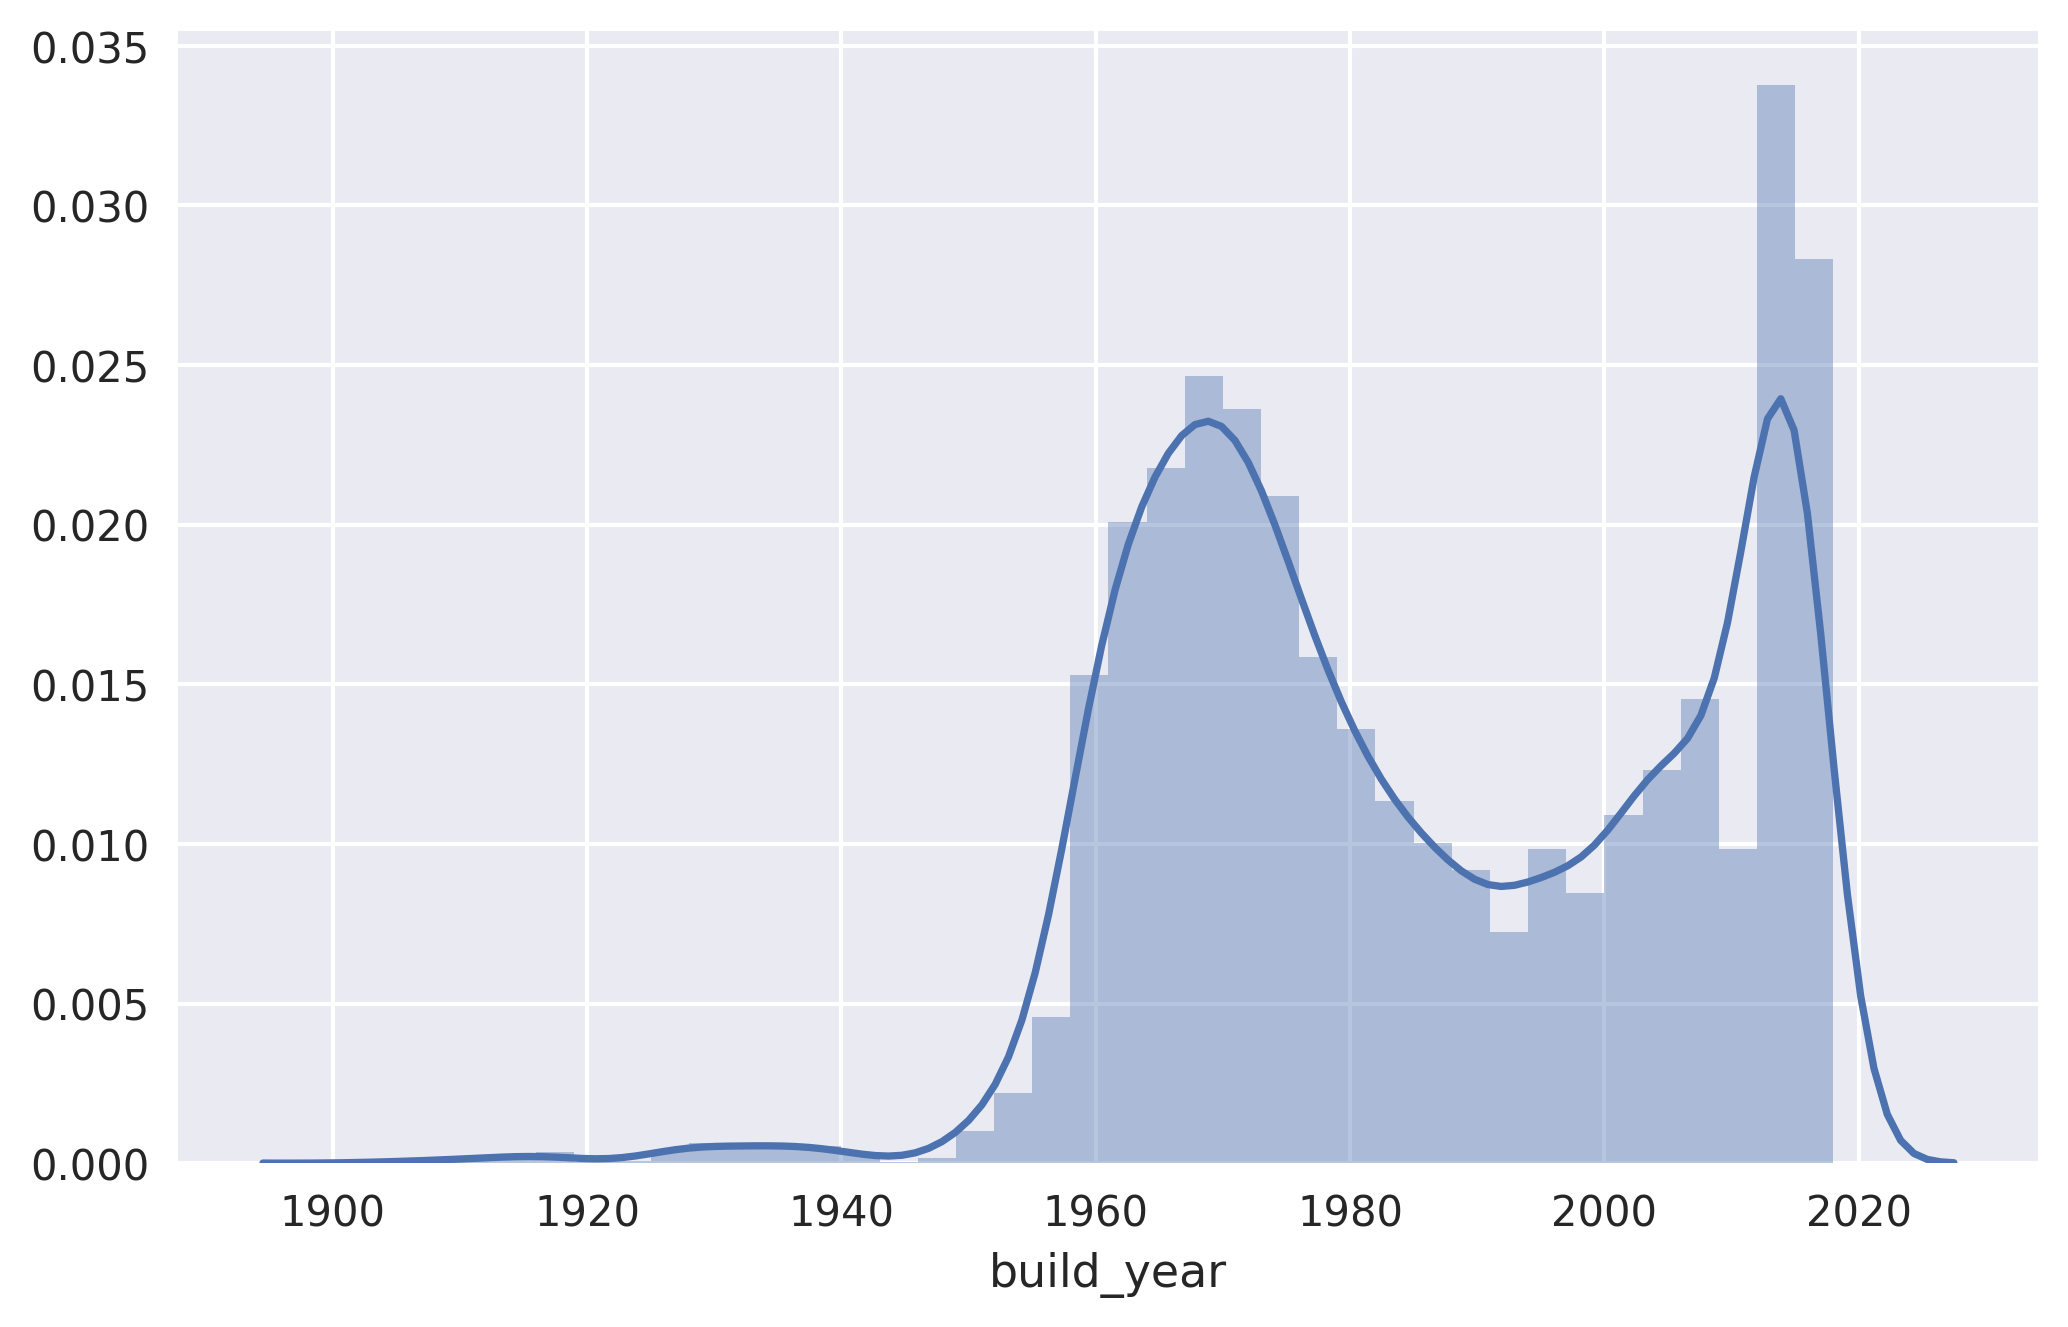

In [55]:
sns.distplot(pd.to_numeric(treated_df_5.loc[(treated_df_5.build_year > 1900) & (treated_df_5.build_year < 2030), 'build_year'].dropna(), downcast='integer'))


In [56]:
build_year_state_target = treated_df_5.loc[:, ['build_year', 'state']].dropna()
lb = LabelBinarizer().fit(build_year_state_target.state.values)
state_binarized_df = lb.transform(build_year_state_target.state.values)
state_binarized_df

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ..., 
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

> build_year 에 따른 state 차이는 눈으로 볼 때 크지 않음

> state 1,2,3,4, 33(오류 추정) 이 있으나 4는 별로 없음
> build_year 로 그룹 시 증가세는 보임

In [57]:
build_year_onehot_state_target = pd.concat([build_year_state_target.build_year, pd.DataFrame(state_binarized_df, columns=lb.classes_)], axis=1)
build_year_onehot_state_target.groupby('build_year').aggregate(np.sum)

1.0    2.0    3.0   4.0   33.0
build_year                                
0.0         30.0   36.0   36.0   4.0   0.0
1.0         32.0   47.0   51.0   2.0   0.0
3.0          0.0    0.0    0.0   1.0   0.0
20.0         1.0    0.0    0.0   0.0   0.0
71.0         NaN    NaN    NaN   NaN   NaN
215.0        NaN    NaN    NaN   NaN   NaN
1860.0       NaN    NaN    NaN   NaN   NaN
1876.0       0.0    1.0    0.0   0.0   0.0
1886.0       NaN    NaN    NaN   NaN   NaN
1890.0       0.0    0.0    1.0   0.0   0.0
1895.0       NaN    NaN    NaN   NaN   NaN
1896.0       0.0    2.0    0.0   0.0   0.0
1900.0       NaN    NaN    NaN   NaN   NaN
1904.0       NaN    NaN    NaN   NaN   NaN
1905.0       NaN    NaN    NaN   NaN   NaN
1906.0       NaN    NaN    NaN   NaN   NaN
1907.0       1.0    0.0    1.0   0.0   0.0
1910.0       0.0    2.0    1.0   0.0   0.0
1911.0       0.0    1.0    0.0   0.0   0.0
1912.0       1.0    2.0    0.0   0.0   0.0
1914.0       NaN    NaN    NaN   NaN   NaN
1915.0       0.0    1.0    0.0   0.0   0.0
1917.0       1.0    1.0    1.0   0.0   0.0
1920.0       0.0    1.0    0.0   0.0   0.0
1924.0       0.0    0.0    1.0   0.0   0.0
1925.0       1.0    0.0    0.0   0.0   0.0
1926.0       0.0    0.0    1.0   1.0   0.0
1927.0       0.0    2.0    2.0   0.0   0.0
1928.0       4.0    2.0    2.0   0.0   0.0
1929.0       2.0    1.0    0.0   0.0   0.0
...          ...    ...    ...   ...   ...
1991.0       8.0   16.0   16.0   1.0   0.0
1992.0      20.0   14.0   30.0   0.0   0.0
1993.0      17.0   19.0   21.0   0.0   0.0
1994.0      18.0   18.0   25.0   0.0   0.0
1995.0      19.0   32.0   22.0   1.0   0.0
1996.0      18.0   27.0   18.0   2.0   0.0
1997.0      10.0   24.0   18.0   0.0   0.0
1998.0      14.0   23.0   19.0   1.0   0.0
1999.0      10.0   14.0   18.0   0.0   0.0
2000.0      17.0   19.0   16.0   2.0   0.0
2001.0      22.0   23.0   23.0   1.0   0.0
2002.0      18.0   23.0   22.0   2.0   0.0
2003.0      15.0   28.0   24.0   3.0   0.0
2004.0      14.0   49.0   36.0   2.0   0.0
2005.0      20.0   24.0   25.0   2.0   0.0
2006.0      25.0   33.0   35.0   2.0   0.0
2007.0      20.0   25.0   38.0   2.0   0.0
2008.0      17.0   40.0   26.0   3.0   0.0
2009.0      22.0   28.0   23.0   1.0   0.0
2010.0      14.0   22.0   20.0   5.0   0.0
2011.0      15.0   17.0   23.0   0.0   0.0
2012.0      22.0   35.0   34.0   4.0   0.0
2013.0      62.0   74.0   70.0   3.0   0.0
2014.0      84.0  123.0  124.0  10.0   0.0
2015.0      37.0   72.0   58.0   2.0   0.0
2016.0       7.0   12.0   10.0   0.0   0.0
2017.0       2.0    6.0    9.0   0.0   0.0
2018.0       NaN    NaN    NaN   NaN   NaN
4965.0       1.0    0.0    0.0   0.0   0.0
20052009.0   0.0    1.0    0.0   0.0   0.0

[118 rows x 5 columns]

In [58]:
build_year_state_target.groupby('build_year').aggregate(np.mean)

state
build_year           
0.0          1.051570
1.0          1.276515
3.0          3.000000
20.0         1.000000
71.0         2.000000
215.0        1.000000
1860.0       2.000000
1876.0       2.000000
1886.0       4.000000
1890.0       2.250000
1895.0       4.000000
1896.0       3.000000
1900.0       4.000000
1904.0       2.000000
1905.0       2.000000
1906.0       2.000000
1907.0       3.000000
1910.0       2.000000
1911.0       2.000000
1912.0       2.800000
1914.0       2.666667
1915.0       2.200000
1917.0       2.357143
1920.0       2.000000
1924.0       3.000000
1925.0       3.000000
1926.0       2.428571
1927.0       2.400000
1928.0       2.818182
1929.0       2.125000
...               ...
1991.0       2.439024
1992.0       2.563910
1993.0       2.540541
1994.0       2.593548
1995.0       2.622378
1996.0       2.541401
1997.0       2.568000
1998.0       2.720588
1999.0       2.803571
2000.0       2.779661
2001.0       2.813253
2002.0       2.835979
2003.0       2.750000
2004.0       2.729064
2005.0       2.789809
2006.0       2.778281
2007.0       2.649485
2008.0       2.644231
2009.0       2.543046
2010.0       2.176000
2011.0       2.164286
2012.0       1.847619
2013.0       1.546729
2014.0       1.101485
2015.0       1.161465
2016.0       1.106557
2017.0       1.032680
2018.0       1.000000
4965.0       3.000000
20052009.0  33.000000

[118 rows x 1 columns]

> build_year가 null인 것은 대부분 state 도 null -> 다른 변수에 기준해서 채워야 함

In [59]:
print(treated_df_5.loc[treated_df_5.build_year.isnull() ==True, ['build_year', 'state']].shape)
print(treated_df_5.loc[(treated_df_5.build_year.isnull() ==True) & \
                (treated_df_5.state.isnull() ==True), ['build_year', 'state']].shape)

(13605, 2)
(11959, 2)


In [60]:
build_year_sub_area_df = treated_df_5.loc[treated_df_5.build_year.isnull() == False, ['build_year', 'sub_area']].copy()
build_year_sub_area_df.head(n=20)

build_year                  sub_area
5696      1907.0                 Hamovniki
5789      2013.0                Nekrasovka
5839      2004.0        Juzhnoe Medvedkovo
5849      2013.0    Poselenie Pervomajskoe
5860      2003.0                  Solncevo
5864      1957.0                 Ajeroport
5870      1986.0  Orehovo-Borisovo Juzhnoe
5915      1995.0                   Mar'ino
5924      1975.0       Chertanovo Severnoe
5936      1962.0                   Ramenki
5951      1960.0           Preobrazhenskoe
5962      1969.0               Dmitrovskoe
5980      1965.0                     Sokol
5989      2010.0              Ostankinskoe
5994      1985.0           Juzhnoe Tushino
6009      1961.0                 Rostokino
6016      2003.0            Juzhnoe Butovo
6019      1985.0              Horoshevskoe
6024      1971.0               Meshhanskoe
6030      1978.0                  Otradnoe

> 지역에 따라 채울 수 있으나 한 가지 년도로 들어간다면 쏠림현상이 발생할 수 있음

In [264]:
build_year_sub_area_df.groupby('sub_area')['build_year'].apply(np.mean).head(n=20)

sub_area
Ajeroport                   1965.093333
Akademicheskoe              1966.086093
Alekseevskoe                1968.353846
Altuf'evskoe                1978.155556
Arbat                       1949.875000
Babushkinskoe               1974.878788
Basmannoe                   1957.222222
Begovoe                     1963.512821
Beskudnikovskoe             1975.646018
Bibirevo                    1978.393939
Birjulevo Vostochnoe        1965.193878
Birjulevo Zapadnoe          1978.445783
Bogorodskoe                 1974.797101
Brateevo                    1960.127820
Butyrskoe                   1976.125000
Caricyno                    1970.360759
Cheremushki               194766.048077
Chertanovo Central'noe      1946.362069
Chertanovo Juzhnoe          1979.433333
Chertanovo Severnoe         1965.166667
Name: build_year, dtype: float64

In [265]:
build_year_sub_area_df.groupby('sub_area')['build_year'].apply(np.std).head(n=20)

sub_area
Ajeroport                 1.616925e+01
Akademicheskoe            1.618006e+02
Alekseevskoe              1.586426e+01
Altuf'evskoe              1.388677e+01
Arbat                     2.198544e+01
Babushkinskoe             1.221092e+01
Basmannoe                 2.617550e+01
Begovoe                   2.122755e+01
Beskudnikovskoe           1.873681e+02
Bibirevo                  6.222829e+00
Birjulevo Vostochnoe      1.999535e+02
Birjulevo Zapadnoe        9.709333e+00
Bogorodskoe               1.799590e+01
Brateevo                  2.421565e+02
Butyrskoe                 1.770284e+01
Caricyno                  9.206642e+00
Cheremushki               1.956592e+06
Chertanovo Central'noe    2.581034e+02
Chertanovo Juzhnoe        1.322594e+01
Chertanovo Severnoe       1.723892e+02
Name: build_year, dtype: float64

> fill build_year by the ratio

In [63]:
treated_df_5.loc[treated_df_5.build_year < 1950, 'build_year'] = 1950
treated_df_5.loc[treated_df_5.build_year > 2016, 'build_year'] = 2016

In [64]:
print(treated_df_5.loc[treated_df_5.build_year.isnull() ==True, ['build_year']].shape)

(13605, 1)


In [266]:
build_year_group_count = treated_df_5.loc[treated_df_5.build_year.isnull() == False, ['build_year']].groupby('build_year').size()
build_year_group_count_ratio = build_year_group_count.loc[(build_year_group_count.index >= 1950) & \
                                                          (build_year_group_count.index < 2017)] / \
                               build_year_group_count.loc[(build_year_group_count.index >= 1950) &\
                                                          (build_year_group_count.index < 2017)].sum()
print(np.sum(build_year_group_count_ratio))
build_year_group_count_ratio.head(n=20)

0.9999999999999999


build_year
1950.0    0.066293
1951.0    0.001378
1952.0    0.002494
1953.0    0.001510
1954.0    0.002133
1955.0    0.003347
1956.0    0.002593
1957.0    0.006662
1958.0    0.010535
1959.0    0.012569
1960.0    0.021365
1961.0    0.017984
1962.0    0.019560
1963.0    0.018148
1964.0    0.017755
1965.0    0.021463
1966.0    0.020905
1967.0    0.022480
1968.0    0.022612
1969.0    0.024253
dtype: float64

In [70]:
fill_build_yearby_ratio_df = pd.DataFrame({'fill_build_yearby_ratio': np.random.choice(build_year_group_count_ratio.index, \
                                                               p=build_year_group_count_ratio.values, size=13605)})
fill_build_yearby_ratio_df.shape

(13605, 1)

In [71]:
treated_df_5.loc[treated_df_5.build_year.isnull() == True, 'build_year'] = fill_build_yearby_ratio_df.values
treated_df_6 = treated_df_5.copy()
treated_df_6.loc[:, 'build_year'].isnull().sum()

0

In [72]:
treated_df_6.shape

(30471, 292)

## state

In [73]:
# reference : https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
np.round(treated_df_6.loc[:, ['build_year', 'state']].groupby('build_year').agg(['mean']))

state
            mean
build_year      
1950.0       1.0
1951.0       2.0
1952.0       2.0
1953.0       2.0
1954.0       3.0
1955.0       2.0
1956.0       2.0
1957.0       2.0
1958.0       2.0
1959.0       2.0
1960.0       2.0
1961.0       2.0
1962.0       2.0
1963.0       2.0
1964.0       2.0
1965.0       2.0
1966.0       2.0
1967.0       2.0
1968.0       2.0
1969.0       2.0
1970.0       2.0
1971.0       2.0
1972.0       2.0
1973.0       2.0
1974.0       2.0
1975.0       2.0
1976.0       2.0
1977.0       2.0
1978.0       2.0
1979.0       2.0
...          ...
1987.0       2.0
1988.0       2.0
1989.0       2.0
1990.0       3.0
1991.0       2.0
1992.0       2.0
1993.0       2.0
1994.0       2.0
1995.0       3.0
1996.0       2.0
1997.0       2.0
1998.0       3.0
1999.0       3.0
2000.0       3.0
2001.0       3.0
2002.0       3.0
2003.0       3.0
2004.0       3.0
2005.0       3.0
2006.0       3.0
2007.0       2.0
2008.0       3.0
2009.0       2.0
2010.0       2.0
2011.0       2.0
2012.0       2.0
2013.0       1.0
2014.0       1.0
2015.0       1.0
2016.0       1.0

[67 rows x 1 columns]

In [269]:
state_target = treated_df_6.loc[treated_df_6.state.isnull() == True, 'build_year']

state_bins = [0, 1952.5, 2013.5, 3000]
state_lables = [3.0, 2.0, 1.0]

state_target_replacer = pd.cut(state_target, state_bins, labels=state_lables)
print(state_target_replacer.shape)
state_target_replacer.head(n=20)

(0,)


Series([], Name: build_year, dtype: category
Categories (3, float64): [3.0 < 2.0 < 1.0])

In [75]:
treated_df_6.loc[treated_df_6.state.isnull() == True, 'state'] = state_target_replacer
treated_df_7 = treated_df_6.copy()
treated_df_7.shape

(30471, 292)

In [80]:
treated_df_7.state.isnull().sum()

0

In [81]:
treated_df_8.loc[treated_df_8.state == 33.0, 'state']

7134    33.0
Name: state, dtype: float64

In [82]:
treated_df_8.loc[7134, 'state'] = 1.0

In [83]:
treated_df_8.shape

(30471, 292)

## material

In [84]:
[index for index in list(treated_df_8.columns)  if 'build_count' in index]

['build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'build_count_before_1920',
 'build_count_block',
 'build_count_brick',
 'build_count_foam',
 'build_count_frame',
 'build_count_mix',
 'build_count_monolith',
 'build_count_panel',
 'build_count_slag',
 'build_count_wood',
 'raion_build_count_with_builddate_info',
 'raion_build_count_with_material_info']

In [4]:
treated_df_8.loc[:, 'build_count_1971-1995'].columns = 'build_count_1971_1995'
treated_df_8.loc[:, 'build_count_1921-1945'].columns = 'build_count_1921_1945'
treated_df_8.loc[:, 'build_count_1946-1970'].columns = 'build_count_1946_1970'

NameError: name 'treated_df_8' is not defined

> rename unappropriate columns name

In [86]:
treated_df_8.rename(columns={'build_count_1971-1995': 'build_count_1971_1995', \
                             'build_count_1921-1945': 'build_count_1921_1945', \
                            'build_count_1946-1970': 'build_count_1946_1970'}, inplace=True)

In [87]:
[index for index in list(treated_df_8.columns)  if 'build_count' in index]

['build_count_1921_1945',
 'build_count_1946-1970',
 'build_count_1971_1995',
 'build_count_after_1995',
 'build_count_before_1920',
 'build_count_block',
 'build_count_brick',
 'build_count_foam',
 'build_count_frame',
 'build_count_mix',
 'build_count_monolith',
 'build_count_panel',
 'build_count_slag',
 'build_count_wood',
 'raion_build_count_with_builddate_info',
 'raion_build_count_with_material_info']

In [88]:
print(np.unique(treated_df_8.material.dropna()))

[ 1.  2.  3.  4.  5.  6.]


In [89]:
treated_df_8.loc[treated_df_8.material.isnull() == False, ['material', 'build_count_1971_1995', \
         'build_count_1921_1945', 'build_count_1971_1995']].groupby('material').aggregate(np.sum)

build_count_1971_1995  build_count_1921_1945  build_count_1971_1995
material                                                                     
1.0                   1038162.0               357631.0              1038162.0
2.0                    168727.0                77702.0               168727.0
3.0                         NaN                    NaN                    NaN
4.0                     68824.0                22160.0                68824.0
5.0                    116489.0                23959.0               116489.0
6.0                     30108.0                 8586.0                30108.0

In [90]:
treated_df_8.material.isnull().sum()

9572

In [91]:
material_group_count = treated_df_8.loc[treated_df_8.build_year.isnull() == False, ['material']].groupby('material').size()
material_group_count_ratio = material_group_count / material_group_count.sum()
print(np.sum(material_group_count_ratio))
print(material_group_count)
material_group_count_ratio

1.0
material
1.0    14197
2.0     2993
3.0        1
4.0     1344
5.0     1561
6.0      803
dtype: int64


material
1.0    0.679315
2.0    0.143213
3.0    0.000048
4.0    0.064309
5.0    0.074693
6.0    0.038423
dtype: float64

In [92]:
fill_material_null_df = pd.DataFrame({'fill_material_null' : np.random.choice(material_group_count_ratio.index, \
                                     p=material_group_count_ratio.values, size=9572)})
fill_material_null_df.shape

(9572, 1)

In [93]:
treated_df_8.loc[treated_df_8.material.isnull() == True, 'material'] = fill_material_null_df.values
treated_df_9 = treated_df_8.copy()
print(treated_df_9.material.isnull().sum())
treated_df_9.shape

0


(30471, 292)

In [94]:
treated_df_9.max_floor.isnull().sum()

9572

## max_floor
for max_floor variable
['max_floor', 'floor', 'kitch_sq', 'full_sq'

> 층수가 max_floor 보다 높은 곳은 max_floor을 높임
> 나머지는 층수 + 평균차

In [95]:
treated_df_9.loc[treated_df_9.max_floor.isnull() == False, ['floor', 'max_floor']].groupby('floor').aggregate(np.mean)

max_floor
floor           
0.0     2.571429
1.0     8.259104
2.0    10.042980
3.0     9.874060
4.0    10.375277
5.0    10.247179
6.0    12.645112
7.0    12.605996
8.0    12.726544
9.0    12.782573
10.0   14.823330
11.0   15.034803
12.0   14.526718
13.0   16.343499
14.0   16.345345
15.0   16.700413
16.0   17.229167
17.0   17.119306
18.0   19.603659
19.0   19.493827
20.0   19.041667
21.0   21.311828
22.0   21.358974
23.0   19.885057
24.0   22.100000
25.0   21.450000
26.0   28.500000
27.0   30.000000
28.0   30.800000
29.0   44.000000
30.0   32.000000
31.0   41.600000
32.0   36.857143
34.0   44.000000
36.0   44.000000
37.0   19.500000
41.0   48.000000
44.0   48.000000
77.0   22.000000

In [96]:
treated_df_9.max_floor.mean() - treated_df_9.floor.mean()

4.888171579275049

In [97]:
treated_df_9.loc[(treated_df_9.max_floor.isnull() == True) & \
                 (treated_df_9.floor.isnull() == True), ['max_floor', 'floor']].shape

(167, 2)

In [98]:
treated_df_9.loc[(treated_df_9.max_floor < treated_df_9.floor), 'max_floor'] = \
treated_df_9.loc[(treated_df_9.max_floor < treated_df_9.floor), 'floor'] + 5.0

In [99]:
treated_df_9.loc[(treated_df_9.max_floor.isnull() == True) & \
                 (treated_df_9.floor.isnull() == False), 'max_floor'] = \
treated_df_9.loc[(treated_df_9.max_floor.isnull() == True) & \
                 (treated_df_9.floor.isnull() == False), 'floor'] + 5.0

> floor 와 동일하게 167 rows 가 null 남음 : kitch_sq 확인 후 median 처리

In [100]:
treated_df_9.max_floor.isnull().sum()

167

In [101]:
treated_df_9.loc[treated_df_9.max_floor.isnull() == False, ['max_floor', 'kitch_sq']].groupby('kitch_sq').aggregate(np.mean)

max_floor
kitch_sq           
5.0       13.001114
6.0       12.348885
7.0       11.694136
8.0       13.286034
9.0       14.947398
10.0      17.176707
11.0      16.104603
12.0      16.001812
13.0      17.215686
14.0      16.991071
15.0      17.194030
16.0      19.053571
17.0      17.384615
18.0      21.333333
19.0      17.739130
20.0      19.080000
21.0      19.250000
22.0      18.125000
23.0      20.250000
24.0      29.600000
25.0      13.500000
26.0      37.000000
27.0      22.000000
28.0      25.000000
29.0      28.000000
30.0      17.500000
31.0      15.666667
32.0      27.666667
33.0      12.500000
34.0      29.000000
...             ...
39.0       6.500000
40.0      17.750000
41.0      15.000000
42.0       3.000000
43.0       9.500000
44.0       5.000000
48.0      25.000000
51.0      17.000000
53.0      17.000000
54.0      31.333333
57.0      18.500000
58.0      19.500000
60.0      18.500000
61.0      13.000000
62.0      12.000000
63.0      16.666667
65.0       6.000000
66.0       2.000000
72.0      16.000000
73.0      10.000000
74.0       9.000000
75.0      12.000000
78.0      15.000000
79.0      17.000000
84.0      17.000000
86.0      12.000000
95.0      14.000000
96.0      25.000000
97.0      17.000000
112.0      8.888889

[63 rows x 1 columns]

In [102]:
treated_df_9.max_floor = treated_df_9.max_floor.fillna(treated_df_9.max_floor.median())

In [103]:
treated_df_9.max_floor.isnull().sum()

0

In [104]:
treated_df_10 = treated_df_9.copy()
treated_df_10.shape

(30471, 292)

##   
## 그 외 나머지 변수 median 처리

In [105]:
median_treat_target = list(treated_df_10.isnull().sum()[treated_df_10.isnull().sum() > 0].index)
median_treat_target

['ID_railroad_station_walk',
 'build_count_1921_1945',
 'build_count_1946-1970',
 'build_count_1971_1995',
 'build_count_after_1995',
 'build_count_before_1920',
 'build_count_block',
 'build_count_brick',
 'build_count_foam',
 'build_count_frame',
 'build_count_mix',
 'build_count_monolith',
 'build_count_panel',
 'build_count_slag',
 'build_count_wood',
 'cafe_avg_price_1000',
 'cafe_avg_price_1500',
 'cafe_avg_price_2000',
 'cafe_avg_price_3000',
 'cafe_avg_price_500',
 'cafe_avg_price_5000',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_5000_max_price_avg',
 'cafe_sum_5000_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_sum_500_min_price_avg',
 'floor',
 'hospital_beds_raion',
 'metro_km_walk',
 'metro_min_walk',
 'preschool_quota',
 'prom_part_5000',
 'railr

In [106]:
median_treated_target_df = treated_df_10.loc[:, median_treat_target].fillna(treated_df_10.loc[:, median_treat_target].median())
median_treated_target_df.shape

(30471, 44)

In [270]:
treated_df_11 = median_treated_target_df.combine_first(treated_df_10).copy()
treated_df_11.isnull().sum().sort_values(ascending=True).head(n=20)

0_13_all                 0
nuclear_reactor_raion    0
nuclear_reactor_km       0
museum_km                0
mosque_km                0
mosque_count_5000        0
mosque_count_500         0
num_room                 0
mosque_count_3000        0
mosque_count_1500        0
mosque_count_1000        0
mkad_km                  0
metro_min_walk           0
metro_min_avto           0
metro_km_walk            0
mosque_count_2000        0
metro_km_avto            0
office_count_1000        0
office_count_2000        0
park_km                  0
dtype: int64

In [109]:
train_processed_20171124_df = pd.merge(train_df[['id', 'price_doc']], treated_df_11, left_on='id', right_on='id', how='inner')
test_processed_20171124_df = pd.merge(test_df[['id']], treated_df_11, left_on='id', right_on='id', how='inner')

In [110]:
print(train_processed_20171124_df.shape)
print(test_processed_20171124_df.shape)

(21570, 293)
(8901, 292)


In [112]:
# train_processed_20171124_df.to_csv('datasets/processed_data/train_processed_20171124_df.csv', index=False)
# test_processed_20171124_df.to_csv('datasets/processed_data/test_processed_20171124_df.csv', index=False)

In [1]:
test_processed_20171124_df = pd.read_csv('datasets/processed_data/test_processed_20171124_df.csv')
test_processed_20171124_df.shape

(8901, 292)

In [2]:
test_processed_20171124_df.timestamp.head(n=10)

0    8/20/11
1    8/27/11
2     9/6/11
3    9/20/11
4    9/20/11
5    9/22/11
6    9/22/11
7    9/23/11
8    9/23/11
9    9/23/11
Name: timestamp, dtype: object

In [3]:
test_processed_20171124_df['timestamp'] = test_processed_20171124_df.timestamp.apply(lambda x : "20" + x.split('/')[2] \
                            + "-" + "{:02}".format(int(x.split('/')[0])) + "-" + "{:02}".format(int(x.split('/')[1])))

In [6]:
# test_processed_20171124_df.to_csv('datasets/processed_data/test_processed_20171125_df.csv', index=False)

> train dataset state 처리

In [5]:
train_processed_20171124_df = pd.read_csv('datasets/processed_data/train_processed_20171124_df.csv')

In [2]:
train_processed_20171124_df.loc[7134, 'state'] = 1.0

In [7]:
# train_processed_20171124_df.to_csv('datasets/processed_data/train_processed_20171127_df.csv', index=False)

##  
##  2. Macro Data Imputation

 ** Median fill **
 

In [113]:
macro_df.describe()

oil_urals     gdp_quart  gdp_quart_growth          cpi          ppi  \
count  2484.000000   2394.000000       2394.000000  2453.000000  2453.000000   
mean     86.467157  16993.230075          1.523726   407.808398   480.216347   
std      27.528709   3187.074480          2.875659    65.895969    70.286366   
min      29.112500   9995.800000         -4.500000   315.100000   337.200000   
25%      61.283300  14925.000000          0.400000   354.000000   438.400000   
50%     101.416500  17442.100000          1.300000   393.000000   473.500000   
75%     109.310000  19284.100000          4.100000   469.400000   520.700000   
max     122.520000  22016.100000          5.200000   531.000000   606.100000   

       gdp_deflator  balance_trade  balance_trade_growth       usdrub  \
count   2119.000000    2453.000000           2394.000000  2481.000000   
mean     110.122308      15.344006             16.846742    40.732406   
std       14.818429       3.878104             16.988727    15.006583   
min       86.721000       5.823000             -4.100000    27.276300   
25%      100.000000      12.785000              7.200000    30.508800   
50%      108.299000      16.041000             10.500000    32.316500   
75%      123.661000      18.076000             21.500000    53.752300   
max      133.160000      21.939000             75.800000    82.276400   

            eurrub         ...          provision_retail_space_modern_sqm  \
count  2481.000000         ...                                 730.000000   
mean     50.444801         ...                                 480.500000   
std      13.905912         ...                                 209.643641   
min      37.445400         ...                                 271.000000   
25%      40.242600         ...                                 271.000000   
50%      42.862200         ...                                 480.500000   
75%      61.323700         ...                                 690.000000   
max      90.881500         ...                                 690.000000   

       turnover_catering_per_cap  theaters_viewers_per_1000_cap  \
count                2191.000000                     1461.00000   
mean                 8691.922410                      580.51540   
std                  1668.967502                       37.98811   
min                  6221.000000                      527.00000   
25%                  6943.000000                      565.00000   
50%                  8522.000000                      603.00000   
75%                 10311.000000                      603.00000   
max                 10805.000000                      627.00000   

       seats_theather_rfmin_per_100000_cap  museum_visitis_per_100_cap  \
count                          2191.000000                 1461.000000   
mean                              0.443398                 1245.543463   
std                               0.016061                  162.526951   
min                               0.410000                  993.000000   
25%                               0.439390                 1240.000000   
50%                               0.450700                 1309.000000   
75%                               0.453560                 1309.000000   
max                               0.458880                 1440.000000   

       bandwidth_sports  population_reg_sports_share  \
count       1826.000000                   1461.00000   
mean      349902.577766                     25.06859   
std        72146.453110                      2.44944   
min       269768.000000                     22.37000   
25%       288177.000000                     23.01000   
50%       329348.000000                     23.01000   
75%       398451.000000                     26.70000   
max       463938.000000                     28.20000   

       students_reg_sports_share  apartment_build  apartment_fund_sqm  
count                1461.000000      1826.000000         1826.000000  
mean            

In [204]:
macro_df.isnull().sum().sort_values(ascending=False)[macro_df.isnull().sum() > 500]

provision_retail_space_modern_sqm         1754
provision_retail_space_sqm                1753
old_education_build_share                 1389
modern_education_share                    1389
theaters_viewers_per_1000_cap             1023
hospital_beds_available_per_cap           1023
hospital_bed_occupancy_per_year           1023
grp_growth                                1023
museum_visitis_per_100_cap                1023
population_reg_sports_share               1023
students_reg_sports_share                 1023
load_of_teachers_preschool_per_teacher    1023
sewerage_share                             658
gas_share                                  658
divorce_rate                               658
baths_share                                658
water_pipes_share                          658
lodging_sqm_per_cap                        658
housing_fund_sqm                           658
pop_total_inc                              658
pop_migration                              658
invest_fixed_

> 카테고리변수 인코딩

In [4]:
def m_encode_cat(df):
    """
       Input : macro_df
       Output : encoded_macro_df
    """
    #get categorical(type='object') variable
    cat_var_df = df.select_dtypes(include=['object']).copy()
    
    
    cleanup_nums = {"child_on_acc_pre_school":{'#!' : 0, '3,013' : 1, '7,311' : 2, '16,765' : 3, '45,713' : 4},                
                "modern_education_share": {'90,92' : 1, '93,08' : 1, '95,4918' : 2},
                "old_education_build_share": {'23,14' : 1, '25,47' : 1, '8,2517' : 2}}
           
    try:
        cat_var_df.replace(cleanup_nums, inplace=True)
    except:
        pass
    
    df = df.drop(cat_var_df.columns, axis=1)
    df = pd.concat([df, cat_var_df], axis=1)
    return df

In [5]:
macro_treated_df_1 = m_encode_cat(macro_df).copy()

In [6]:
macro_treated_df_1.child_on_acc_pre_school.unique()

array([  4.,   0.,   2.,   1.,   3.,  nan])

> 데이터 timestamp에 따른 병합

In [221]:
macro_treated_df_1.shape

(2484, 102)

In [240]:
macro_treated_df_2 = macro_treated_df_1.fillna(macro_treated_df_1.median()).copy()

In [243]:
macro_treated_df_2.isnull().sum().sort_values(ascending=False)

month                                     0
unemployment                              0
grp_growth                                0
income_per_cap                            0
real_dispos_income_per_cap_growth         0
salary                                    0
salary_growth                             0
fixed_basket                              0
retail_trade_turnover                     0
retail_trade_turnover_per_cap             0
retail_trade_turnover_growth              0
labor_force                               0
employment                                0
mortgage_rate                             0
invest_fixed_capital_per_cap              0
invest_fixed_assets                       0
profitable_enterpr_share                  0
unprofitable_enterpr_share                0
share_own_revenues                        0
overdue_wages_per_cap                     0
fin_res_per_cap                           0
marriages_per_1000_cap                    0
divorce_rate                    

In [246]:
# macro_treated_df_2.to_csv('datasets/processed_data/macro_processed_by_fillna_median_20171125.csv', index=False)